In [2]:
#Import initial dependencies

import pandas as pd
import pyodbc 

#Establish connection to SQL database

conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=tcp:group1-owner-nu.database.windows.net,1433;'
                      'Database=final-project;'
                      'Persist Security Info=False;'
                      'Uid=GROUPDB1NU;'
                      'Pwd=NU02282021!;'
                      'MultipleActiveResultSets=False;'
                      'Encrypt=Yes;'
                      'TrustServerCertificate=No;'
                      'Connection Timeout=30;')


cursor = conn.cursor()

#Read tables from SQL

initial_df = pd.read_sql("SELECT * FROM dbo.final_table", conn)

initial_df.head()


,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,VintagePrice,VintageRatingPriceRatio,Age,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,Idig GG,2012,German,Riesling,4.3,106,83.95,0.051221,9,4.3,869,83.95,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,Idig GG,2014,German,Riesling,4.1,95,77.95,0.052598,7,4.3,869,77.95,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,Idig GG,2015,German,Riesling,4.3,105,57.55,0.074718,6,4.3,869,57.55,0.074718
3,Abadal Nuat 2015,Abadal,Nuat,2015,None,None,4.1,29,31.99,0.128165,6,3.9,253,31.99,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,Le Domaine Blanco de Guarda,2015,None,None,4.1,149,29.00,0.141379,6,4.2,1424,29.00,0.144828


In [7]:
X = initial_df[["Winery", "WineName", "Year","Region", "RegionalVariety", "VintageRatingCount","VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingCount", "WineRatingPriceRatio"]]
y = initial_df["VintageRating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4593, 11) (4593, 1)


In [3]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Feature: 0, Score: 81.14681
Feature: 1, Score: 80.99626
Feature: 2, Score: 38.20769
Feature: 3, Score: 97.62644
Feature: 4, Score: 11.42255
Feature: 5, Score: 24.43549
Feature: 6, Score: 35.08942
Feature: 7, Score: 78.41928
Feature: 8, Score: 76.70629
Feature: 9, Score: 23.20936
Feature: 10, Score: 65.79965


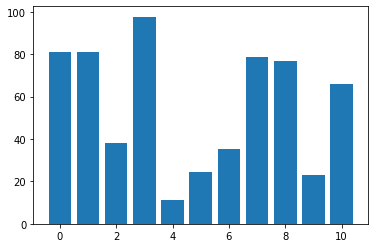

In [8]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=4593, n_features=11, n_informative=11, random_state=1)

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [10]:
# Drop features below score of 40
clean_df = initial_df.drop(['WineName', 'Region', 'RegionalVariety', 'VintageRatingCount', 'WineRatingCount', 'Age', 'WinePrice'], axis=1)
clean_df.head()

,FullName,Winery,Year,VintageRating,VintagePrice,VintageRatingPriceRatio,WineRating,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,2012,4.3,83.95,0.051221,4.3,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,2014,4.1,77.95,0.052598,4.3,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,2015,4.3,57.55,0.074718,4.3,0.074718
3,Abadal Nuat 2015,Abadal,2015,4.1,31.99,0.128165,3.9,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,2015,4.1,29.00,0.141379,4.2,0.144828


In [11]:
X = clean_df[["FullName", "Winery", "Year", "VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingPriceRatio"]]
y = clean_df["VintageRating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4593, 7) (4593, 1)


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OrdinalEncoder(), make_column_selector(dtype_include=object))
)
ct.fit_transform(X)

array([[-4.55430303e-02, -9.20341508e-01,  7.99379490e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.50000000e+01],
       [-5.92462914e-02, -8.95248644e-01,  7.99379490e-01, ...,
         1.00000000e+00,  0.00000000e+00,  2.70000000e+01],
       [-1.05837379e-01, -4.92119789e-01,  7.99379490e-01, ...,
         2.00000000e+00,  0.00000000e+00,  2.80000000e+01],
       ...,
       [-8.69953951e-02, -6.90548479e-01,  2.29882050e-01, ...,
         4.57600000e+03,  1.23700000e+03,  3.10000000e+01],
       [-1.67205150e-01,  5.22279929e-01, -9.09112831e-01, ...,
         4.59100000e+03,  1.24100000e+03,  2.70000000e+01],
       [-1.84128677e-01,  1.43555664e+00, -9.09112831e-01, ...,
         4.59200000e+03,  1.24100000e+03,  3.10000000e+01]])

In [21]:
model = make_pipeline(ct, LinearRegression())

In [22]:
# visualize pipeline
from sklearn import set_config
set_config(display="diagram")
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000207F1C80748>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000207982930C8>)])),
                ('linearregression', LinearRegression())])

In [23]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
# fit model with training data
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000207F1C80748>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000207982930C8>)])),
                ('linearregression', LinearRegression())])

In [25]:
# steps that transform input data into a format understod by the model
model.steps

[('columntransformer',
  ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x00000207F1C80748>),
                                  ('ordinalencoder', OrdinalEncoder(),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x00000207982930C8>)])),
 ('linearregression', LinearRegression())]

ValueError: could not convert string to float: 'Capannelle Chardonnay Toscana 2010'

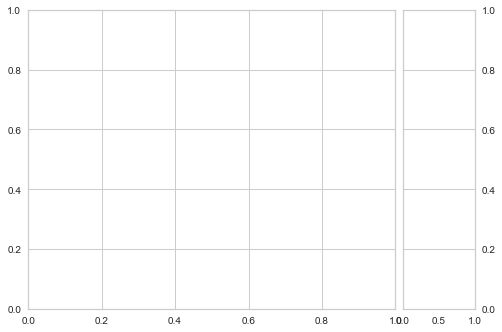

In [37]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [27]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

ValueError: Found unknown categories ['Ata Rangi Craighall Chardonnay 2015', 'Martin Codax Rías Baixas Albariño Organistrum 2015', 'Georg Breuer Berg Schlossberg Riesling 2017', 'Jean François Ganevat Les Grands Teppes Vieilles Vignes 2012', 'Domaine Thomas & Fils Le Pierrier Sancerre 2017', 'Château Margaux Pavillon Blanc du Château Margaux 2010', 'Chanson Chardonnay Chassagne-Montrachet 2014', "Domaine Laroche Chablis Grand Cru 'Les Clos' 2009", 'Egon Müller - Scharzhof Scharzhofberger Riesling Kabinett 2016', 'Josmeyer H Vieilles Vignes Pinot Auxerrois 2015', 'Pierre Morey Les Tessons Meursault 2015', "Jean-Paul & Benoit Droin Chablis Grand Cru 'Les Clos' 2010", 'Domaine Yves Gangloff Condrieu 2015', 'Vincent Dauvissat Les Clos Chablís Grand Cru 2010', 'Louis Chèze Ro-Rée Saint-Joseph Blanc 2017', 'Newton Chardonnay Unfiltered 2016', 'Silverado Miller Ranch Sauvignon Blanc 2017', 'Domaine Pattes Loup Chablis 2017', 'Château Haut-Brion Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2006', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Auslese 2011', 'Hamilton Russell Vineyards Chardonnay 2017', 'Ata Rangi Craighall Chardonnay 2017', 'Gaja Gaia & Rey Langhe 2016', "Domaine Laroche Chablis Grand Cru 'Les Clos' 2010", 'Kühling-Gillot Pettenthal Riesling GG 2015', 'Kante Vitovska 2006', 'Catena Zapata Adrianna Vineyard White Bones Chardonnay N.V.', 'Luddite Chenin 2014', "Olivier Leflaive Meursault 1er Cru Blagny Sous Le Dos d'Âne 2014", 'Domaine Leflaive Bâtard-Montrachet Grand Cru 2014', 'Leeuwin Estate Art Series Chardonnay 2015', 'Kistler McCrea Vineyard Chardonnay 2017', 'Domaine Ponsot Morey-Saint-Denis Premier Cru Clos des Monts Luisants Vieilles Vignes 2015', 'Dominio do Bibei Ribeira Sacra Lapola 2016', 'Louis Latour Chevalier-Montrachet Grand Cru Les Demoiselles 2010', 'Chêne Bleu Viognier 2016', 'Philippe Pacalet Chassagne-Montrachet 2014', 'Marc Kreydenweiss Kastelberg Grand Cru 2013', 'Olivier Leflaive Bâtard-Montrachet Grand Cru 2006', 'Saint Clair Omaka Reserve Chardonnay 2016', 'El Molino Chardonnay 2010', 'Domaine Roulot Meursault Blanc 2015', 'Ratzenberger St. Jost GG 2013', 'Louis Latour Chassagne-Montrachet Premier Cru 2014', "Bouchard Père & Fils Meursault 1er Cru 'Les Gouttes d'Or' Blanc 2011", "Emidio Pepe Trebbiano d'Abruzzo 2015", 'Vincent Dauvissat Les Clos Chablís Grand Cru 2015', 'Valdesil Pezas da Portela Godello 2016', "Francois Carillon Saint-Aubin 1er Cru 'Les Pitangerets' Blanc 2013", 'Joseph Drouhin Meursault Genevrières Premier Cru 2015', "Château Mouton Rothschild Aile d'Argent Blanc Bordeaux 2014", 'Château de Beaucastel Châteauneuf-du-Pape Blanc 2017', "Philippe Colin Chassagne-Montrachet Premier Cru 'Les Chenevottes' 2016", 'Aubert Chardonnay Larry Hyde & Sons 2013', 'Domaine du Castel La Vie Blanc 2018', 'Guiberteau Brézé Saumur Blanc 2015', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Silex 2016', 'Francois Carillon Puligny-Montrachet 2011', 'Quinta Nova de Nossa Senhora do Carmo Mirabilis Grande Reserva Branco 2017', 'Thorne & Daughters Paper Kite Old Vine Sémillon 2017', "Michel Chevre Les Pentes Clos de l'Écotard Saumur 2016", "Henri Bourgeois Sancerre D'Antan 2016", 'Joachim Flick Hochheim Königin Victoriaberg Riesling Trocken 2016', 'Domaine William Fèvre Chablis Grand Cru Les Clos 2016', 'Faiveley Bienvenues-Bâtard-Montrachet Grand Cru 2011', 'Gravner Anfora Ribolla Gialla 2009', "Marisa Cuomo Fiorduva Costa d'Amalfi 2017", 'Cantina Giardino Bianco 2017', 'Dönnhoff Hermannshöhle Riesling GG 2011', 'Catena Zapata Adrianna Vineyard White Bones Chardonnay 2014', 'Gérard Boulay Sancerre à Chavignol Blanc 2018', 'Domaine Leflaive Bourgogne Blanc 2016', "Domaine Michelot Meursault 'Clos Saint-Felix' Monopole 2015", 'Battenfeld Spanier Am Schwarzen Herrgott Riesling 2016', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'La Boudriotte' 2015", 'S.A. Prüm Wehlener Sonnenuhr Riesling Spätlese 2009', 'Clos Rougeard Brézé Saumur Blanc 2012', "Domaine Georges Vernay Les Chaillées de L'Enfer Condrieu 2015", 'Marc Colin Saint-Aubin La Fontenotte 2015', 'Anselmo Mendes Curtimenta Alvarinho 2016', 'Joseph Drouhin Chassagne-Montrachet Premier Cru Morgeot Marquis de Laguiche  2013', 'Olivier Leflaive Puligny-Montrachet 1er Cru Les Pucelles 2014', 'Château Smith Haut-Lafitte Pessac-Léognan Blanc 2016', 'S.A. Prüm Wehlener Sonnenuhr Riesling Kabinett 2008', 'Hervé Souhaut Domaine Romaneaux - Destezet 2016', "Marcel Deiss Riesling Alsace Grand Cru 'Altenberg de Bergheim' 2007", "Joseph Drouhin Drouhin - Vaudon Chablis Grand Cru 'Les Clos' 2013", "Etienne Sauzet Puligny-Montrachet 1er Cru 'Champ Gain' 2009", 'Domaine Jean-Louis Chave Hermitage Blanc 2010', 'Domaine Huet Vouvray Clos du Bourg Sec 2017', 'Joseph Phelps Freestone Vineyards Chardonnay 2017', "Le Vigne di Zamò Vigne Cinquant'Anni Friulano 2015", 'Bonneau du Martray Corton-Charlemagne Grand Cru 2013', "Abbatucci Diplomate d'Empire (Cuvée Collection Il Cavaliere) 2013", 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Spätlese 2001', 'Luigi Bosca Gala 3 White Blend 2014', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Blanc Fumé de Pouilly 2016', 'Reichsgraf von Kesselstatt Kaseler Riesling Trocken 2016', 'Sonberk Pálava 2017', 'Flowers Sonoma Coast Chardonnay 2015', 'Sadie Family Palladius 2017', 'Domaine Tempier Bandol Blanc 2015', 'Hugel Grossi Laüe Pinot Gris 2011', 'Skerk Ograde 2017', 'Henri Bourgeois Pouilly-Fumé La Demoiselle de Bourgeois 2008', "Château d'Yquem Y 2009", 'E. Guigal Condrieu La Doriane 2006', 'Jean-Paul & Benoit Droin Chablis 2015', 'Kühling-Gillot Pettenthal Riesling GG 2012', 'Monteviejo Lindaflor Chardonnay 2016', 'Planeta Eruzione 1614 Carricante 2017', 'Vessigaud Pouilly-Fuissé Vieilles Vignes 2017', 'Domaine Rapet Corton-Charlemagne Grand Cru 2013', "Domaine Fabien Coche (Domaine Coche-Bizouard) Meursault 'Les Chevalières' 2016", "Jean Claude Bachelet & Fils Saint-Aubin Premier Cru 'Le Charmois' 2015", 'Domaine Coche-Dury Puligny-Montrachet Les Enseignères 2010', 'J. Hofstätter Kolbenhof Gewürztraminer 2017', 'Tapanappa Tiers Vineyard Chardonnay 2008', "Domaine de l'Ecu Carpe Diem 2013", 'Cakebread Chardonnay 2015', 'Domaine William Fèvre Chablis Grand Cru Bougros 2015', 'Château La Mission Haut-Brion Pessac-Léognan Blanc (Château Laville Haut-Brion) (Grand Cru Classé de Graves) 1985', 'Vincent Dauvissat Chablís 2015', 'Uva Mira Mountain Vineyards The Single Tree Chardonnay 2016', "Domaine Long Depaquit Chablis Premier Cru 'Les Vaucoupins' 2016", 'Ramey Chardonnay Platt Vineyard 2013', "Domaine Bachey-Legros Vieilles Vignes Chassagne-Montrachet 1er Cru 'Morgeot' 2015", 'Hubert Lamy Le Concis du Champs Chassagne-Montrachet 2015', 'Duca di Salaparuta Bianca di Valguarnera 2014', 'Chanson Meursault 2012', 'Gaja Gaia & Rey Langhe 1998', 'Patrick Piuze Terroir de Courgis Chablis 2015', 'Château de Santenay Chassagne-Montrachet 2014', 'Bachelet-Monnot Puligny-Montrachet 2015', 'Vincent Dauvissat Les Clos Chablís Grand Cru 2008', "Billaud-Simon Chablis Grand Cru 'Vaudesir' 2015", 'Yardstick Raised by Wolves La Colline Semillon 2016', 'Damijan Podversic Ribolla Gialla 2015', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Auslese 2012', "Jean Chartron Rully 'Montmorin' 2017", 'Coume del Mas Folio Collioure 2018', 'Albert Bichot Meursault 2015', "Raveneau Chablis Premier Cru 'Montée de Tonnerre' 2006", 'Marcel Deiss Mambourg Grand Cru 2014', 'Joh. Jos. Prüm Bernkasteler Badstube Riesling Kabinett 2015', 'Château de Tracy Pouilly-Fumé 2015', 'Williams Selyem Unoaked Chardonnay 2015', "Castell d'Encus Ekam 2017", "Domaine de la Rectorie L'Argile Collioure 2016", 'Badenhorst White Blend 2013', 'Delas Clos Boucher Condrieu 2013', 'Albert Bichot Château Gris Les Terrasses Monopole Nuits-Saint-Georges 2009', 'Penfolds Reserve Bin A Chardonnay 2015', "Amiot Guy Chassagne-Montrachet 1er Cru 'Cailleret' 2014", "Château de La Maltroye Chassagne-Montrachet 1er Cru Morgeot 'Vigne Blanche' 2013", 'Pierre Morey Meursault 2015', 'Zidarich Vitovska Kamen 2016', 'Quintarelli Giuseppe Veneto Amabile del Cere Passito Bianco 2003', 'Jermann W... Dreams Bianco (Were Dreams...) 2014', "Domaine Long Depaquit Chablis Grand Cru 'Les Clos' 2015", 'Louis Latour Corton-Charlemagne Grand Cru 2010', 'Trimbach Clos Sainte Hune Riesling Alsace 2012', 'Lucien le Moine Chassagne-Montrachet 1er Cru Grandes Ruchottes 2009', 'Gaja Gaia & Rey Langhe 2010', 'Ata Rangi Petrie Chardonnay 2014', 'Château Margaux Pavillon Blanc du Château Margaux 2011', 'Quinta de La Rosa Douro Reserva White 2017', 'Marimar Estate Don Miguel Vineyard La Masía Chardonnay 2014', 'Vessigaud Pouilly-Fuissé Vieilles Vignes 2016', "La Chablisienne Chablis Grand Cru 'Les Preuses' 2012", "Francois et Antoine Jobard Meursault 'En la Barre' 2016", 'Hugel Jubilee Riesling 2009', "Jean-Marc Brocard Chablis Premier Cru 'Vau de Vey' 2016", 'Alain Jaume Domaine Grand Veneur Châteauneuf-Du-Pape La Fontaine Blanc 2015', 'Journey Chardonnay 2015', 'Chivite Navarra Coleccion 125 Blanco 2016', 'Vincent Dauvissat Les Clos Chablís Grand Cru 2011', "Philippe Colin Chassagne-Montrachet Premier Cru 'Les Chenevottes' 2017", 'Torres Milmanda 2016', 'Patrick Javillier Cuvée Tete de Murger Meursault 2013', 'Koehler-Ruprecht Kallstadter Saumagen Riesling Kabinett Trocken 2008', "Raveneau Chablis Premier Cru 'Montée de Tonnerre' 2013", "Château de Chamirey Mercurey Premier Cru 'La Mission' Monopole 2017", 'Orin Swift Mannequin 2016', 'Kumeu River Coddington Chardonnay 2010', 'St. Michael-Eppan Sanct Valentin Chardonnay 2017', 'Domaine Jacques Prieur Montrachet Grand Cru Blanc 2013', 'Saint Clair Wairau Reserve Sauvignon Blanc 2017', 'Domaine Zind Humbrecht Gewürztraminer Alsace Grand Cru Goldert 2013', 'Les Héritiers du Comte Lafon Les Maranches Mâcon-Uchizy 2011', 'Antoine Arena Carco Patrimonio Blanc 2017', 'Patrick Piuze Terroir de Chablis 2017', 'Dr. Von Bassermann-Jordan Jesuitengarten Riesling GG 2018', 'Van Volxem Weissburgunder 2014', 'Sadie Family Skurfberg (Die Ouwingerdreeks) 2016', 'T-Oinos Clos Stegasta Αsyrtiko 2014', 'Stella Bella Suckfizzle Sauvignon Blanc - Sémillon 2014', 'Paul Jaboulet Aîné Hermitage Le Chevalier de Sterimberg 2014', 'Momento Chenin Blanc - Verdelho 2017', 'Schäfer-Fröhlich Vulkangestein Riesling Trocken 2013', 'Alzinger Smaragd Loibenberg Grüner Veltliner 2016', 'David & Nadia Chenin Blanc 2016', 'Domaine Zind Humbrecht Pinot Gris Alsace Clos Windsbuhl 2005', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'Les Caillerets' 2013", "Château de Chamirey Mercurey Premier Cru 'La Mission' Monopole 2014", 'Willi Schaefer Graacher Domprobst Riesling Spätlese 2016', 'Dönnhoff Felsenberg GG 2017', 'Vincent Dauvissat Chablís 2013', 'La Meulière Chablis Monts de Milieu 1er Cru 2017', 'Domaine de la Tournelle Les Corvées sous Curon 2015', 'Collovray & Terrier Deux Roches Vieilles Vignes Pouilly-Fuissé 2017', 'Paco de Santar Vinha do Contador Dão Branco 2014', "Terra d'Alter Telhas Alentejano Branco 2014", 'Domaine de La Romanée-Conti Montrachet Grand Cru 2007', 'Walter Hansel The North Slope Vineyard Chardonnay 2016', 'Antinori Castello della Sala Cervaro della Sala 2018', 'Neudorf Vineyards Chardonnay 2014', 'Merlin Vieilles Vignes Mâcon La Roche Vineuse 2012', 'Domaines Schlumberger Cuvée Christine Gewürztraminer Alsace Vendanges Tardives 2015', 'M. Chapoutier Ermitage Le Méal Blanc 2011', 'Louis Jadot - Domaine Duc de Magenta Chassagne-Montrachet 1er Cru Morgeot Monopole Clos de La Chapelle Blanc 2015', 'Skerk Vitovska 2017', 'Barta Pince Öreg Király Dűlő Mád Furmint 2015', 'Planeta Chardonnay 2018', 'Dönnhoff Niederhäuser Hermannshöhle Riesling Spätlese 2013', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Buisson Renard 2007', 'Château de Beaucastel Châteauneuf-du-Pape Blanc 2015', 'Domaine William Fèvre Chablis Grand Cru Les Clos 2005', 'Domaine de Montille Corton-Charlemagne Grand Cru 2014', 'Domaine Henri Milan Le Grand Blanc 2014', 'Philippe Foreau Vouvray Sec 2016', 'Reyneke Reserve White 2016', 'Vincent Pinard Grand Chemarin Sancerre 2014', 'Pithon-Paillé Coteau des Treilles Anjou 2013', "Au Pied du Mont Chauve Chassagne Montrachet 1er Cru 'Les Vergers' 2013", 'Domaine Coche-Dury Meursault Blanc 2007', 'Pascal Jolivet Pouilly-Fumé Indigene 2016', 'Domaine Coche-Dury Meursault Les Rougeots 2007', 'Bucci Villa Bucci Riserva 2015', 'Domaine Coche-Dury Meursault Les Rougeots 2008', 'Pierre-Yves Colin-Morey Saint-Aubin Premier Cru En Remilly 2016', 'Château de Puligny Montrachet Puligny-Montrachet 2016', "François Mikulski Meursault 1er Cru 'Charmes' 2015", 'Bénédicte et Stéphane Tissot La Mailloche 2015', "Jean-Claude Ramonet Chassagne-Montrachet Premier Cru 'Les Ruchottes' Blanc 2013", "Domaine de la Vougeraie Vougeot 1er Cru 'Le Clos Blanc de Vougeot' (Monopole) 2013", "Hubert Lamy Santenay 1er Cru 'Clos des Gravières' Blanc 2015", "Rémi Jobard Meursault 'Sous La Velle' 2017", 'Château Smith Haut-Lafitte Pessac-Léognan Blanc 2015', 'Mchenry Hohnen Burnside Vineyard Chardonnay 2015', 'Domaine Pierre Prieur & Fils Cuvée Maréchal Prieur Sancerre Blanc 2014', 'Terra Remota Caminante 2018', 'Olivier Leflaive Chevalier-Montrachet Grand Cru 2013', 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Pucelles 2011', 'Philippe Foreau Vouvray Demi-Sec 2016', 'Kabaj Amfora 2007', "Jean Noël Gagnard Chassagne-Montrachet 1er Cru 'Les Caillerets' Blanc 2009", 'Domaines Schlumberger Cuvée Christine Gewürztraminer Alsace Vendanges Tardives 2006', 'Oliver Zeter Fumé Sauvignon Blanc 2018', 'Louis Jadot Bâtard-Montrachet Grand Cru 2014', 'Domaine des Comtes Lafon Meursault Clos de la Barre 2013', 'Domaine Zind Humbrecht Riesling Alsace Grand Cru Rangen De Thann Clos Saint Urbain 2016', 'Francois Villard Condrieu Le Grand Vallon 2015', 'Gerard Duplessis Chablis 2017', "Château d'Yquem Y 2017", 'Louis Jadot Bâtard-Montrachet Grand Cru 2013', 'Nicolas Joly Clos de la Coulée de Serrant 2016', 'Domaine Marc Morey & Fils Chassagne-Montrachet Blanc 2017', 'Thevenet Quintaine Cuvée E.J. Thevenet Viré-Clessé 2009', "Château de La Maltroye Chassagne-Montrachet 1er Cru 'La Romanée' 2013", 'Daniel-Etienne Defaix Chablis Vieilles Vignes 2014', 'Paul Hobbs Ellen Lane Estate Chardonnay 2016', 'Grosset Polish Hill Riesling 2017', 'Château Fonréaud Le Cygne Bordeaux Blanc 2015', 'Le Soula Blanc 2013', 'Tiefenbrunner Feldmarschall von Fenner Müller 2011', 'Cabeças do Reguengo Equinócio Branco 2015', "Château de Meursault Meursault 1er Cru 'Perrières' 2013", 'Yves Cuilleron Condrieu La Petite Côte 2012', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2008', 'Bret Brothers & The Soufrandière La Soufrandière Climat Les Longeays Pouilly-Vinzelles 2015', 'R. López de Heredia Viña Tondonia Viña Gravonia 2006', 'Gran Moraine Chardonnay 2016', 'Albert Bichot Montagny Premier Cru 2015', 'Chanson Chassagne-Montrachet Premier Cru Les Chenevottes 2015', 'Sadie Family Palladius 2014', 'Cornin Pouilly-Fuissé 2015', 'Sartarelli Balciana 2008', "Domaine Leflaive Puligny-Montrachet 1er Cru 'Clavoillon' 2015", 'Jermann Vintage Tunina 2009', 'Joh. Jos. Prüm Graacher Himmelreich Riesling Kabinett 2017', 'Telmo Rodriguez MR (Mountain Wine) 2015', 'Jean-Paul & Benoit Droin Chablis Premier Cru Vosgros 2017', 'Kistler Chardonnay 2010', 'Luigi Bosca Gala 3 White Blend 2017', 'Louis Michel & Fils Chablis 2017', 'Nicolas Joly Clos de la Coulée de Serrant 2014', 'Bastianich Vespa Bianco 2015', 'Louis Latour Bâtard-Montrachet Grand Cru 2009', 'Bucci Villa Bucci Riserva 2014', 'Bachelet-Monnot Chassagne-Montrachet 2016', 'Francois Carillon Le Clos du Vieux Château Puligny-Montrachet 2015', "Moreau-Naudet Chablis 1er Cru 'Forêts' 2016", 'Hatzidakis Nykteri 2017', 'Bonneau du Martray Corton-Charlemagne Grand Cru 2014', 'Thevenet Quintaine Cuvée E.J. Thevenet Viré-Clessé 2010', 'Bonneau du Martray Corton-Charlemagne Grand Cru 1997', 'Louis Jadot - Domaine Duc de Magenta Puligny-Montrachet 1er Cru Clos de la Garenne 2015', "Hubert Lamy Saint-Aubin 1er Cru 'Derrière Chez Edouard' Blanc 2015", 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2009', "Hubert Lamy Saint-Aubin 1er Cru 'En Remilly' 2014", 'Château La Mission Haut-Brion Pessac-Léognan Blanc (Château Laville Haut-Brion) (Grand Cru Classé de Graves) 1993', "La Chablisienne Chablis 1er Cru 'Les Lys' 2014", 'Chacra Chardonnay 2018', 'Domaine A Cailbourdin Triptyque Pouilly-Fumé 2015', 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2005', 'Domaine de Montille Bourgogne Blanc 2016', "Domaine de Saint Pierre Chardonnay 'Les Brûlées' 2016", 'Louis Latour Bâtard-Montrachet Grand Cru 2005', 'de Ladoucette Baron de L Pouilly-Fumé 2012', "Domaine William Fèvre Chablis Grand Cru 'Les Preuses' 2007", 'Radikon Slatnik 2016', 'Domaine du Vieux Télégraphe Châteauneuf-du-Pape (La Crau) Blanc 2011', 'Varner Home Block Spring Ridge Vineyard Chardonnay 2013', "Francois Villard Saint Joseph Fruit d'Avilleran 2017", 'Henri Bourgeois Sancerre La Bourgeoise Blanc 2016', 'Patrick Javillier Les Tillets Meursault 2014', 'Au Bon Climat Hildegard 2014', 'Terras Gauda La Mar 2015', 'André Perret Condrieu 2014', 'Villa Huesgen Enkircher Steffensberg Riesling Kabinett Feinherb 2014', 'DAOU Reserve Chardonnay 2017', 'J.M. Boillot Puligny-Montrachet Premier Cru Champ-Canet 2013', 'Château de Puligny Montrachet Saint-Aubin 1er Cru En Remilly 2016', "Bitouzet-Prieur Puligny-Montrachet 'Les Levrons' 2015", 'Quinta da Sequeira Grande Reserva Branco 2014', "Jean-Marc Brocard Chablis Grand Cru 'Les Clos' 2016", "Celine & Laurent Tripoz Mâcon-Vinzelles 'Les Morandes' 2017", 'Pegasus Bay Sauvignon - Sémillon 2013', 'Hugel Jubilee Riesling 2004', 'Domaine Zind Humbrecht Riesling Alsace Clos Häuserer 2016', 'Remoissenet Père & Fils Puligny-Montrachet 2014', 'Alain Girard & Fils Domaine des Brosses Sancerre 2017', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Kabinett 2009', 'Louis Latour Bâtard-Montrachet Grand Cru 2007', 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2007', 'Lvnae Vermentino (Etichetta Nera/Black Label) 2017', 'Domaine Weinbach Clos des Capucins Cuvée Theo Riesling Alsace 2018', 'Pierre-Yves Colin-Morey Saint-Aubin Premier Cru La Chatenière 2016', 'Faiveley Meursault 2016', 'Mullineux Quartz Chenin Blanc 2017', 'Joseph Drouhin Corton-Charlemagne Grand Cru 2016', 'Marani Satrapezo 10 Kvevri 2015', 'Movia Sivi Ambra Grigio 2011', 'Albert Mann Pinot Gris Grand Cru Hengst 2013', 'Schloss Johannisberg Silberlack Riesling Trocken GG 2014', 'Can Ràfols dels Caus La Calma 2016', "Domaine des Malandes Chablis Premier Cru 'Vau de Vey' 2015", "Etienne Sauzet Puligny-Montrachet 1er Cru 'La Garenne' 2013", 'Simonnet-Febvre Les Clos Chablis Grand Cru 2009', 'Domaine Coche-Dury Meursault Les Rougeots 2005', 'Domaine William Fèvre Chablis Premier Cru Fourchaume 2011', 'Tomac Amfora 2008', 'Marqués de Riscal Limousin 2017', 'Domaine Coche-Dury Meursault Blanc 2012', 'Marimar Estate Don Miguel Vineyard Albariño 2016', 'Joseph Drouhin Puligny-Montrachet Premier Cru Folatières 2008', 'Greywacke Riesling 2015', 'Donabaum Setzberg Riesling Smaragd 2015', 'Domaine Sigalas Santorini Barrel 2016', 'Louis Latour Corton-Charlemagne Grand Cru 2015', 'Joh. Jos. Prüm Graacher Himmelreich Riesling Spätlese 2010', 'Domaine Zind Humbrecht Gewürztraminer Alsace Grand Cru Goldert 2007', "Domaine Bohrmann Meursault 'Clos du Cromin' 2011", 'Domaine du Vieux Télégraphe Châteauneuf-du-Pape (La Crau) Blanc 2016', 'Domaine Coche-Dury Meursault Blanc 2014', 'Szepsy Nyulászó Cuvée 2015', 'Francois Carillon Puligny-Montrachet 2016', 'Domaine Vacheron Sancerre Les Romains 2016', "Cos d'Estournel Cos d'Estournel Blanc 2013", 'Rippon Mature Vine Riesling 2018', "Sylvain Loichet Ladoix 'Bois de Gréchons' 2015", 'Reichsrat von Buhl Ungeheuer GG 2015', 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Folatières 2010', 'Domaine Huet Vouvray Le Haut-Lieu Sec 2015', 'Kistler Dutton Ranch Chardonnay 2011', 'Matthew Van Heerden Chardonnay 2016', "Domaine François Lumpp Givry 1er Cru 'Petit Marole' Blanc 2014", 'Elena Walch Beyond the Clouds 2012', 'Domaine de la Charbonnière Châteauneuf-du-Pape Blanc 2016', 'Louis Latour Puligny-Montrachet 1er Cru Les Referts 2013', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2017', 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Folatières 2012', 'Jermann Vintage Tunina 2017', 'Jean François Ganevat Cuvée Florine 2014', 'Pierre-Yves Colin-Morey Saint-Aubin Premier Cru Les Champlots 2015', 'Domaine Laroche Les Vaillons Vieilles Vignes Chablis Premier Cru 2016', 'Domaine des Comtes Lafon Meursault 2012', 'Gauby Jasse Blanc Côtes Catalanes 2018', 'Nicolas Joly Clos de la Coulée de Serrant 2009', "Domaine de l'Arlot Nuits-Saint-Georges Premier Cru Clos de L'Arlot Blanc 2015", 'Dr. H. Thanisch Berncasteler Doctor Riesling Kabinett 2015', 'Au Bon Climat Hildegard 2016', 'J. Rochioli Estate Grown Chardonnay 2014', 'Luis A. Rodriguez Vazquez A Teixa Ribeiro 2016', 'Collovray & Terrier Deux Roches Saint-Véran Tradition 2017', "Henri Darnat Meursault 'Clos du Domaine' 2015", 'Alta Alella Lanius 2017', 'Paul Prieur & Fils Monts Damnes Sancerre 2017', 'M. Chapoutier Chante-Alouette Hermitage Blanc 2017', 'Domaine Henri & Gilles Buisson Saint-Romain La Perriere 2015', "Domaine William Fèvre Chablis Grand Cru 'Les Preuses' 2014", "Vincent Girardin Meursault 'Les Narvaux' 2016", "Domaine Laroche Chablis Grand Cru Les Blanchots Reserve de l'Obédience 2009", 'Trefethen Chardonnay 2016', "Marcel et Blanche Fèvre Chablis Grand Cru  'Les Preuses' 2015", 'Paul Jaboulet Aîné Hermitage Le Chevalier de Sterimberg 2016', 'Domaine de Trévallon Alpilles Blanc 2015', 'Hogan Wines Chenin Blanc 2015', 'Voyager Estate Chardonnay 2014', 'Poeira Branco 2016', 'Louis Latour Chablis La Chanfleure 2017', 'Olivier Leflaive Saint-Romain Sous-Le-Chateâu 2014', 'Garnier et Fils Chablis 2017', 'Franz Hirtzberger Singerriedel - Riesling Smaragd 2015', 'Arnaud Ente Bourgogne Chardonnay 2016', 'Catena Zapata Adrianna Vineyard White Stones Chardonnay 2014', 'Arnaud Ente Bourgogne Chardonnay 2015', 'Terlan (Terlano) Gewürztraminer Lunare 2012', 'Abbatucci Général de la Révolution (Cuvée Collection) 2015', 'Olivier Leflaive Corton-Charlemagne Grand Cru 2012', 'Domaine Jean-Louis Chave Selection Hermitage Blanche 2013', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Spätlese 2014', 'Château Malartic-Lagravière Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2009', 'Domaine Tempier Bandol Blanc 2018', 'François Mikulski Meursault 2017', 'Bouchard Père & Fils Montrachet Grand Cru Blanc 2006', 'Arínzano Gran Vino Blanco 2010', 'Cà dei Frati Brolettino Lugana 2014', 'Sine Qua Non Entre Chien et Loup 2015', "Château d'Yquem Y 2004", 'Yalumba The Virgilius Viognier 2016', 'Alois Lageder Am Sand Gewürztraminer 2016', 'Domaine Alain Chavy Puligny-Montrachet 2016', 'Marc Kreydenweiss Wiebelsberg Grand Cru 2014', 'Louis Max Mercurey Les Rochelles 2016', 'Yves Cuilleron Condrieu La Petite Côte 2018', "Samuel Billaud Chablis 1er Cru 'Montee de Tonnerre' (Les Grands Terroirs) 2015", "Domaine Leflaive Meursault 1er cru sous le Dos d'Ane 2010", "Domaine de la Rectorie L'Argile Collioure 2014", 'Stephane Montez - Domaine du Monteillet Saint-Joseph Blanc 2016', 'Pietradolce Archineri Etna Bianco 2017', 'Sarnin Berrux Saint-Romain Blanc 2014', 'E. Guigal Condrieu La Doriane 2017', 'Flametree S.R.S Wallcliffe Chardonnay 2016', 'Vincent Dauvissat La Forest Chablís 1er Cru 2011', "Domaine de la Cote de l'Ange Châteauneuf-du-Pape Blanc 2016", 'Peyre Rose Oro Blanc 2003', "Jean-Baptiste Adam Vieilles Vignes L'Auxerrois 2016", 'Valdesil Pezas da Portela Godello 2015', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'Morgeot' Blanc 2012", "Jean-Paul & Benoit Droin Chablis Grand Cru 'Les Clos' 2015", 'Szepsy Tokaji Furmint 2015', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2001', 'Bire GRK 2018', 'Pazo Barrantes La Comtesse de Pazo Barrantes Albariño 2015', 'Lis Neris Gris 2016', 'François Mikulski Meursault 2016', 'Cloudy Bay Te Koko Sauvignon Blanc 2010', 'Domaines Ott Clos Mireille Blanc de Blancs 2018', 'De Martino Tres Volcanes Chardonnay 2017', 'Greywacke Chardonnay 2014', 'Pierre-Yves Colin-Morey Chassagne-Montrachet Les Ancegnières 2011', 'Adega Familiar Eladio Piñeiro Frore de Carme 2015', 'Marcel Deiss Gruenspiel 2013', 'Le Vieux Donjon Châteauneuf-du-Pape Blanc 2016', 'Chavy-Chouet Puligny-Montrachet Les Folatieres 1er Cru 2016', 'Manincor Eichhorn Pinot Bianco 2017', 'Domaine de La Romanée-Conti Montrachet Grand Cru 2011', 'Trimbach Clos Sainte Hune Riesling Alsace 2002', 'Raveneau Chablis 2011', 'Conceito Branco 2014', 'Ornellaia Poggio alle Gazze 2015', 'Tablas Creek Vineyard Esprit de Tablas Blanc 2011', 'Louis Jadot - Domaine Duc de Magenta Puligny-Montrachet 1er Cru Clos de la Garenne 2014', 'Stephane Montez - Domaine du Monteillet Les Grandes Chaillées Condrieu 2017', 'Κτημα Τσελεπου (Estate Tselepos) Canava Chrissou Tselepos Santorini Vieilles Vignes 2014', "Domaine Long Depaquit Chablis Grand Cru 'Les Vaudésirs' 2015", 'Peter Franus Albariño 2016', 'Idiom Viognier 2016', 'Domaine Michelot Meursault 2016', 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2001', 'Henri Bourgeois Sancerre La Chapelle Des Augustins 2013', "Domaine Leflaive Meursault 1er cru sous le Dos d'Ane 2016", 'Varner Bee Block Spring Ridge Vineyard Chardonnay 2014', 'Domaine Jean-Louis Chave Hermitage Blanc 2013', "Château d'Yquem Y 2012", 'Jean-Michel Gerin La Loye Condrieu 2018', 'Jean-Michel Gerin La Loye Condrieu 2014', 'Can Bas La Creu 2018', 'Domaine Coche-Dury Puligny-Montrachet Les Enseignères 2013', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'Morgeot' Blanc 2015", 'Bonneau du Martray Corton-Charlemagne Grand Cru 1996', 'Michel & Stéphane Ogier Les Vieilles Vignes de Jacques Vernay Condrieu 2014', 'Domaine Rapet Corton-Charlemagne Grand Cru 2015', 'Château Pape Clément Pessac-Léognan Blanc 2013', 'Flam Blanc 2018', 'Sadie Family Mev. Kirsten (Die Ouwingerdreeks) 2017', 'Domaine Saumaize-Michelin Pouilly-Fuissé Clos Sur la Roche 2016', 'Domaine du Pelican Arbois Savagnin Ouillé 2016', 'Kistler McCrea Vineyard Chardonnay 2012', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Les Referts' 2011", 'Waterford Estate Chenin Blanc 2018', 'Vincent Dauvissat Chablís 2017', 'Holden Manz Barrel Fermented Chardonnay 2018', 'Radikon Slatnik 2017', 'Franz Hirtzberger Hochrain - Riesling Smaragd 2009', 'Francois et Antoine Jobard Meursault-Blagny 1er Cru 2014', 'Château Haut-Brion La Clarté de Haut-Brion Pessac-Léognan Blanc (Les Plantiers du Haut-Brion) 2014', "Raveneau Chablis Premier Cru 'Montée de Tonnerre' 2000", "Jacques Carillon Puligny-Montrachet Premier Cru 'Les Champs Canet' 2015", 'Kistler Trenton Roadhouse Chardonnay 2012', 'Vincent Pinard Harmonie Sancerre 2014', 'E. Guigal Condrieu 2015', 'Domaine Leflaive Bienvenues-Bâtard-Montrachet Grand Cru 2013', 'Peter Michael Belle Côte Chardonnay 2015', 'Stanley Estates Sauvignon Blanc 2016', 'Château Pape Clément Pessac-Léognan Blanc 2007', "Michel Bouzereau Meursault 'Les Grands Charrons' 2016", 'St. Michael-Eppan Appius 2014', "Dupont-Fahn Meursault 'Les Vireuils' 2016", 'André Perret Condrieu Chery 2017', 'Dr. Loosen Wehlener Sonnenuhr Riesling Spätlese 2015', 'Leroy Chassagne-Montrachet Blanc 2009', 'Domaine Anne Gros Cuvée Marine Bourgogne Hautes-Côtes de Nuits Blanc 2017', 'R. López de Heredia Viña Tondonia Viña Tondonia Reserva Blanco 2005', 'Heitz Cellar Chardonnay 2016', 'Marqués de Murrieta Capellanía 2014', 'Franz Haas Manna Schweizer 2016', 'Elena Walch Vigna Kastelaz Gewürztraminer 2018', 'Domaine Leflaive Bâtard-Montrachet Grand Cru 2012', 'Alphonse Mellot Sancerre 2017', 'Villa Russiz Sauvignon de la Tour 2012', 'Quinta da Pellada Primus 2014', 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Folatières 2015', 'Covela Fantástico 2014', 'Yering Station Chardonnay 2016', 'Domaines Ott Clos Mireille Blanc de Blancs 2017', 'Leroy Bourgogne Blanc 2016', "Domaine de Chassorney Saint-Romain 'Combe Bazin' 2016", "Peter Michael L'Après-Midi Sauvignon Blanc 2015", 'Casa da Passarella O Fugitivo Garrafeira Branco 2015', "Raveneau Chablis Premier Cru 'Butteaux' 2004", 'Bonneau du Martray Corton-Charlemagne Grand Cru 2006', 'Clemens Busch Marienburg GG Falkenlay 2016', "Joseph Drouhin Chassagne-Montrachet Premier Cru 'Embazées' 2016", 'Joseph Mellot La Grande Châtelaine Sancerre 2013', 'Momento Mori Staring at the Sun 2018', 'Kistler Vine Hill Vineyard Chardonnay 2013', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Silex 2012', 'Shaw + Smith M3 Chardonnay 2014', "Raveneau Chablis Grand Cru 'Valmur' 2015", 'Casal Farneto Cimaio Bianco 2015', 'Château de Puligny Montrachet Chassagne-Montrachet 2016', 'Evening Land Summum  Seven Springs Vineyard Chardonnay 2014', 'Quinta das Bágeiras Pai Abel Branco 2015', 'Domaine des Comtes Lafon Meursault-Charmes Premier Cru 2015', 'São João 95 Anos de História Blanco 2014', "Domaine Laroche Chablis Premier Cru 'Les Vaudevey' 2018", 'Domaine Henri Boillot Corton-Charlemagne Grand Cru 2014', 'Kistler Stone Flat Vineyard Chardonnay 2012', 'Domaine des Héritiers Louis Jadot Corton-Charlemagne Grand Cru 2005', 'Domaine Coche-Dury Meursault Les Rougeots 2009', 'Manincor Le Petit 2015', 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2012', 'Ramey Russian River Valley Chardonnay 2015', 'Terlan (Terlano) Pinot Bianco Riserva Vorberg 2016', 'Yeringberg Viognier 2015', 'Wittmann Kirchspiel Riesling GG 2016', 'Hamilton Russell Vineyards Chardonnay 2016', "La Chablisienne Chablis 1er Cru 'Côte de Lechet' 2017", 'Michel & Stéphane Ogier Viognier de Rosine 2017', 'Quinta da Muradella Gorvia Blanco 2012', 'Trimbach Pinot Gris Alsace Réserve Personnelle 2015', 'Domaine Georges Vernay Coteau de Vernon Condrieu 2016', "Emile Balland Croq'Caillotte Sancerre 2017", 'Pierre-Yves Colin-Morey Saint-Aubin Premier Cru La Chatenière 2017', 'Bucaco Branco Reservado 2003', "Domaine Bernard Moreau et Fils Chassagne-Montrachet 1er Cru 'La Maltroie' 2015", 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2013', 'Domaine Joel Delaunay La Voûte Chenonceaux Touraine 2017', "Christian Moreau Pere & Fils Chablis Grand Cru 'Les Clos' 2017", 'Terlan (Terlano) Terlaner Classico 1991', 'Domaine des Lambrays Puligny-Montrachet Premier Cru Clos du Cailleret 2009', 'Pierre Gaillard Condrieu 2017', 'Domaine Ostertag Muenchberg Riesling 2017', 'Château Carbonnieux Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2013', 'Marcel Deiss Gruenspiel 2011', 'Bachelder Chardonnay 2014', "Valentin Zusslin Riesling Alsace Grand Cru 'Pfingstberg' 2012", 'Vincent Dauvissat Séchet Chablís Premier Cru 2010', 'J. Rochioli Estate Grown Chardonnay 2012', 'Josmeyer Riesling Grand Cru Hengst 2014', "Domaine Roulot Meursault 1er Cru 'Clos des Bouchères' Monopole 2015", 'Bouchard Père & Fils Meursault Les Clous 2015', 'Do Ferreiro (Bodegas Gerardo Mendez) Cepas Vellas Rias Baixas Albariño 2018', 'HDV Chardonnay (Hyde Vineyard) 2014', 'Tolpuddle Chardonnay 2016', 'Paul Pillot Chassagne-Montrachet 2016', 'de Ladoucette Baron de L Pouilly-Fumé 2017', 'Benoît Ente Puligny-Montrachet 2016', "Domaine Georges Vernay Les Terrasses de L'Empire Condrieu 2011", 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2014', 'Mullineux Radicales Libres 2012', "Domaine Leflaive Meursault 1er cru sous le Dos d'Ane 2009", 'Marcel Deiss Grasberg 2013', 'Antinori Castello della Sala Cervaro della Sala 2016', 'Tiefenbrunner Feldmarschall von Fenner Müller 2016', 'Domaine Ostertag Fronholz Riesling 2016', 'Bénédicte et Stéphane Tissot Les Bruyères 2016', 'Tramin Stoan 2016', "Chanson Chablis Premier Cru 'Montmains' 2012", "Jean-Louis Chavy Puligny-Montrachet 1er Cru 'Les Folatières' 2015", 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2003', 'Joh. Jos. Prüm Graacher Himmelreich Riesling Spätlese 2009', 'Domaine Vacheron Sancerre Le Paradis 2017', 'Dog Point Section 94 Sauvignon Blanc 2014', "Louis Michel & Fils Chablis Premier Cru 'Butteaux' 2017", 'Cape of Good Hope Serruria Chardonnay 2016', "Domaine de la Motte Chablis 1er Cru 'Vau Ligneau' 2016", 'Franz Hirtzberger Steinporz - Weifzburgunder Smaragd 2015', 'Domaine de Bellevue Gaïa 2017', "Domaine de la Vougeraie Vougeot 1er Cru 'Le Clos Blanc de Vougeot' (Monopole) 2011", 'Reichsrat von Buhl Jesuitengarten GG 2012', 'Gaja Rossj-Bass Langhe 2013', 'François Crochet Les Perrois Sancerre 2017', 'Domaine de Montille Puligny-Montrachet 1er Cru Le Cailleret 2013', 'Famille Perrin Châteauneuf-du-Pape Les Sinards Blanc 2011', 'Niepoort Douro Redoma Branco 2016', 'Bucaco Branco Reservado 2013', 'Tramin Unterebner Pinot Grigio 2017', 'Paul Hobbs CrossBarn Sonoma Coast Chardonnay 2015', 'Dog Point Section 94 Sauvignon Blanc 2017', 'Joaquin Vino della Stella Fiano de Avellino 2015', 'Jean-Baptiste Adam Cuvée Jean-Baptiste Kaefferkopf Grand Cru Riesling 2012', 'Château Malartic-Lagravière Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2010', 'Capichera Vign’angena Vermentino di Gallura 2018', 'Yves Cuilleron Condrieu La Petite Côte 2016', 'Château Margaux Pavillon Blanc du Château Margaux 2008', "Raveneau Chablis Premier Cru 'Forêt' 2006", 'Domaine Roulot Meursault Blanc 2011', "Ca' del Bosco Chardonnay 2014", 'Berthet Bondet Château-Chalon 2010', 'Bret Brothers & The Soufrandière Terres de Vergisson Pouilly-Fuissé 2015', 'J.A. Ferret Tournant de Pouilly Pouilly-Fuissé (Cuvée Hors-Classe) 2014', 'Comte Lafond Sancerre Blanc 2017', "Francois Carillon Puligny-Montrachet 1er Cru 'Les Perrières' 2012", 'Domaine Henri Boillot Meursault 1er Cru Les Genevrières 2017', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Les Folatières' 2013", 'La Sorga Ginnungagap 2015', 'Dopff au Moulin Gewürztraminer Grand Cru Brand de Turckheim 2011', "Rémi Jobard Meursault 1er Cru 'Le Poruzot-Dessus' 2014", 'Auvigue Le Moulin du Pont Saint-Véran 2016', "Domaine Alain Chavy Puligny-Montrachet 1er Cru 'Les Folatières' 2012", 'Sadie Family Skerpioen (Die Ouwingerdreeks) 2018', 'Domaine des Comtes Lafon Meursault Clos de la Barre 2014', "Domaine Laurent Cognard Montagny Premier Cru 'Les Bassets' 2016", "La Pousse d'Or Puligny-Montrachet 1er Cru 'Le Cailleret' 2013", 'Château Smith Haut-Lafitte Pessac-Léognan Blanc 2013', 'TOR Durell Vineyard Chardonnay 2014', 'Château de Beaucastel Coudoulet de Beaucastel Côtes du Rhône Blanc 2009', 'J. Bouchon Granito Semillon 2017', 'Alfredo Arribas Trossos Tros Blanc 2013', 'Beaumont Hope Marguerite 2017', 'Schloss Johannisberg Silberlack Riesling Trocken GG 2018', 'Arnaud Ente Bourgogne Chardonnay 2014', "Jean-Claude Ramonet Pernand Vergelesses 'Les Belles Filles' 2015", 'Clemens Busch Marienburg GG Fahrlay 2015', 'Château La Mission Haut-Brion Pessac-Léognan Blanc (Château Laville Haut-Brion) (Grand Cru Classé de Graves) 1998', 'Chavy-Chouet Meursault Les Charmes 1er Cru 2016', "Ervideira Conde d'Ervideira Private Selection Branco 2016", 'Domaine Valette Vieilles Vignes Mâcon-Chaintré 2014', 'Domaine Henri Boillot Puligny-Montrachet 2017', "Arnaud Ente Meursault 'Clos des Ambres' 2010", 'Pepe Mendoza Casa Agrícola Velo Flor Ánfora 2017', 'Marcel Deiss Schoffweg (Le Chemin des Brebis) 2014', 'St. Michael-Eppan Sanct Valentin Weissburgunder (Pinot Bianco) 2016', "Jean-Paul & Benoit Droin Chablis Grand Cru 'Les Clos' 2007", 'J.A. Ferret Les Perrières Pouilly-Fuissé 2016', 'Vina Antunović Premium Limited Edition Chardonnay Sur Lie 2011', "M. Chapoutier Ermitage de l'Orée 1999", 'Chanson Pouilly-Fuissé 2013', 'Domaine Coche-Dury Meursault Blanc 2006', 'Domaine Serge Laloue Sancerre Blanc 2015', 'Pierre Morey Les Tessons Meursault 2009', 'Terras Gauda Terras Gauda O Rosal Etiqueta Negra (Black Label) 2017', 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2002', 'Marc Colin Puligny-Montrachet Le Trézin 2015', 'Von Winning Deidesheimer Kalkofen GG 2017', "Domaine Long Depaquit Chablis Grand Cru 'Moutonne' (Monopole) 2012", 'Guffens-Heynen Tri de Chavigne Mâcon-Pierreclos 2016', 'Louis Latour Chevalier-Montrachet Grand Cru Les Demoiselles 1999', 'Olivier Leflaive Montagny 1er Cru Bonneveaux 2016', 'Michel & Stéphane Ogier La Combe de Malleval Condrieu 2018', "Francois Carillon Puligny-Montrachet 1er Cru 'Les Combettes' 2013", 'Jean-Claude Ramonet Chassagne-Montrachet Blanc 2016', 'Delas Clos Boucher Condrieu 2014', 'Domaine Henri Milan Le Grand Blanc 2015', 'Bader-Mimeur Chateau de Chassagne-Montrachet Blanc 2014', 'Catena Alta Chardonnay 2016', "Vie di Romans Dut' Un 2016", 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2004', "Cave Vinicole de Hunawihr Riesling Alsace Grand Cru 'Rosacker' 2018", 'Jean François Ganevat Champs Poids Chardonnay 2016', "Billaud-Simon Chablis Grand Cru 'Preuses' 2015", 'Faiveley Corton-Charlemagne Grand Cru 2012', 'Olivier Leflaive Bâtard-Montrachet Grand Cru 2009', 'Durand Réserve Durand Sancerre 2017', 'François Mikulski Meursault 2014', 'Domaine Coche-Dury Bourgogne Chardonnay 2016', "Guillot-Broux Mâcon-Cruzille 'Les Genièvrières' 2017", 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2011', 'Faiveley Corton-Charlemagne Grand Cru 2013', 'Beaumont Hope Marguerite 2016', 'Hogan Wines Chenin Blanc 2016', 'Heitz-Lochardet Meursault En la Barre 2015', 'Louis Latour Corton-Charlemagne Grand Cru 2007', 'HDV Chardonnay (Hyde Vineyard) 2009', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2005', 'Alheit Vineyards Hemelrand Vine Garden 2016', 'Chavy-Chouet Les Enseignères Puligny-Montrachet 2017', 'Borgo del Tiglio Collio Friulano 2014', 'Domaine Coche-Dury Puligny-Montrachet Les Enseignères 2012', 'Conceito Branco 2010', 'Domaine Leflaive Puligny-Montrachet 2015', 'Grgich Hills Chardonnay 2014', "Domaine Laroche Chablis Grand Cru 'Les Blanchots' 2012", 'Henri Bourgeois Les Ruchons Sancerre Blanc 2015', 'Joseph Drouhin Puligny-Montrachet Premier Cru Folatières 2015', "Domaine Bohrmann Puligny-Montrachet 'Grands Champs' 2011", 'Hubert Lamy Les Tremblots Vieilles Vignes Puligny-Montrachet 2014', 'Domaine Blain-Gagnard Bâtard-Montrachet Grand Cru 2015', 'Alphonse Mellot Génération Dix-Neuf Sancerre 2016', 'Gaja Rossj-Bass Langhe 2011', 'Pago de Vallegarcía Vallegarcia Viognier 2015', 'Domaine Leflaive Pouilly-Fuissé 2017', 'André Perret Condrieu Chery 2015', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'Les Caillerets' 2009", "Charly Nicolle Chablis Premier Cru 'Mont de Milieu' 2016", 'Jolie-Laide Fanucchi-Wood Road Trousseau Gris 2017', "Château Mouton Rothschild Aile d'Argent Blanc Bordeaux 2012", 'Clos des Papes (Paul Avril) Châteauneuf-du-Pape Blanc 2011', "Domaine de Chassorney Saint-Romain 'Combe Bazin' 2015", 'B Vintners Haarlem to Hope 2017', 'Nicolas Joly Clos de la Coulée de Serrant 1994', 'Sadie Family Palladius 2007', 'Elian Da Ros Coucou Blanc 2017', "Domaine Laroche Chablis Grand Cru Les Blanchots Reserve de l'Obédience 2015", 'Ossian Capitel 2015', 'Franz Keller Schlossberg Achkarren GG Grauburgunder 2015', 'Aubert Chardonnay Ritchie Vineyard 2014', 'Château de Tracy 101 Rangs Pouilly-Fumé 2012', 'Sadie Family Palladius 2011', 'Matrot Meursault-Blagny 1er Cru 2006', 'Robert Sinskey Orgia 2014', 'Domaine Roulot Meix Chavaux Meursault 2009', 'Eulogio Pomares Maceración Con Pieles 2017', 'Paul Pernot Bienvenues Bâtard - Montrachet Grand Cru 2004', 'Château de Beaucastel Vieilles Vignes Roussanne 2017', 'Domaine Bernard Moreau et Fils Chassagne-Montrachet 2016', 'Château Pape Clément Clémentin de Pape Clément Pessac-Léognan Blanc 2013', 'Korta Katarina Pošip 2017', 'Faiveley Bienvenues-Bâtard-Montrachet Grand Cru 2013', "Domaine de la Janasse Viognier Principauté d'Orange 2018", 'Catena Zapata Adrianna Vineyard White Stones Chardonnay 2016', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Les Combettes' 2015", 'Domaine William Fèvre Chablis Grand Cru Les Clos 2007', 'Bénédicte et Stéphane Tissot Les Graviers 2017', 'Domaine William Fèvre Chablis Grand Cru Bougros 2013', "Domaine Maratray-Dubreuil Ladoix 1er Cru 'En Nagets' Monopole 2014", 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Folatières 2004', 'Domaine du Closel - Château des Vaults Les Caillardières Savennières 2016', 'Domaine William Fèvre Chablis Premier Cru Vaulorent 2017', 'Chavy-Chouet Meursault Les Narvaux 2017', 'Bouchard Père & Fils Corton-Charlemagne Grand Cru Blanc 2009', "Domaine des Malandes Chablis Grand Cru 'Les Clos' 2011", 'Joseph Mellot Cuvée Pierre Etienne Sancerre 2015', 'Botanica Chenin Blanc 2016', 'Louis Latour Corton-Charlemagne Grand Cru 2002', 'Domaine Coche-Dury Corton-Charlemagne Grand Cru 2004', 'Lucien le Moine Corton Grand Cru Blanc 2010', 'Rall White 2017', 'Chavy-Chouet Clos des Corvées de Citeau Meursault 2017', "Domaine Borgeot Puligny-Montrachet 'Les Grands Champs' 2017", 'Cà dei Frati Pratto Bianco (Pratto Benaco Bresciano) 2015', 'Kistler McCrea Vineyard Chardonnay 2006', 'Springfield Estate Méthode Ancienne Chardonnay 2016', "Edmond Vatan Sancerre 'Clos la Néore' 2011", 'Frescobaldi Gorgona 2016', 'Domaine Ostertag Clos Mathis Riesling 2016', 'Vincent Dauvissat Les Preuses Chablís Grand Cru 2007', 'Domaine Weinbach Clos des Capucins Cuvée Sainte Catherine Riesling Alsace Grand Cru Schlossberg 2008', "Domaine Bachey-Legros Santenay 'Sous la Roche' 2016", 'Marcel Deiss Alsace Grand Cru Schoenenbourg 2008', 'Château de Fosse-Sèche Arcane 2016', 'Bagnol Cassis 2018', 'Loimer Langenlois Käferberg 2015', 'Domaine Tessier Les Charmes Dessus Meursault 1er Cru 2014', 'Bonneau du Martray Corton-Charlemagne Grand Cru 2017', 'Domaine du Vieux Lazaret Châteauneuf-du-Pape Blanc 2016', 'Taylors / Wakefield St. Andrews Chardonnay 2017', 'Leitz Rüdesheimer Berg Roseneck Katerloch Riesling 2011', 'Château de Beaucastel Châteauneuf-du-Pape Blanc 2014', "Château de Chamirey Mercurey 'En Pierrelet' Blanc 2014", "Tokara Director's Reserve White 2014", 'Château Haut-Brion Pessac-Léognan Blanc (Grand Cru Classé de Graves) 1999', "Francois Carillon Puligny-Montrachet 1er Cru 'Les Combettes' 2016", 'Domaine William Fèvre Chablis Grand Cru Bougros 2011', "Gaja Ca'Marcanda Vistamare Toscana 2017", 'Francois Carillon Puligny-Montrachet 2012', 'Domaine Zind Humbrecht Pinot Gris Alsace Clos Windsbuhl 2015', 'Matassa Blossom Blanc 2018', "Faiveley Meursault 1er Cru 'Blagny' Blanc 2014", 'Domaine Leflaive Puligny-Montrachet 2010', 'Marcel Deiss Mambourg Grand Cru 2011', 'Albert Mann Pinot Gris Grand Cru Furstentum 2013', 'Lukas Van Loggerenberg Kameraderie 2016', 'Gran Moraine Chardonnay 2015', 'Château-Grillet Blanc 2002', 'Mullineux Quartz Chenin Blanc 2016', 'Quinta do Vale Meão Meandro Douro Branco 2017', 'Château Fuissé Pouilly-Fuissé Le Clos Monopole 2017', 'Francois et Antoine Jobard Meursault-Blagny 1er Cru 2013', 'Lismore Sauvignon Blanc 2017', "Domaine du Pavillon Beaune 1er Cru 'Le Clos des Mouches' 2011", 'Patz & Hall Hyde Vineyard Chardonnay 2015', 'Mullineux Old Vines White 2014', 'Bénédicte et Stéphane Tissot La Mailloche 2011', "Hubert Lamy Saint-Aubin 1er Cru 'Les Frionnes' 2012", "Jean Chartron Puligny-Montrachet Premier Cru 'Clos de la Pucelle' Monopole 2011", "Domaine Henri Boillot Puligny-Montrachet 1er Cru 'Clos de La Mouchère' (Monopole) 2011", 'Agnès Paquet Auxey-Duresses Blanc 2017', 'Penfolds Yattarna Chardonnay (BIN 144) 2017', 'Gaja Rossj-Bass Langhe 2017', 'Bonneau du Martray Corton-Charlemagne Grand Cru 2007', "Hubert Lamy Santenay 1er Cru 'Clos des Gravières' Blanc 2014", "Eric Forest L'Ame Forest Pouilly-Fuissé 2016", 'Paul Pernot Puligny-Montrachet 2016', 'Domaine des Sénéchaux Châteauneuf-du-Pape Blanc 2017', 'Domaine de Pouilly Cuvée Prestige Pouilly-Fuisse 2017', "Domaine Laroche Chablis Grand Cru Les Blanchots Reserve de l'Obédience 2011", 'Marc Colin Saint-Aubin 1er Cru La Chatenière 2016', 'Marcassin Marcassin Vineyard Chardonnay 2008', 'Von Winning Sauvignon Blanc 500 2017', "Bruno Colin Chassagne-Montrachet Premier Cru 'Les Chaumées' 2013", 'Bosman Family Vineyards Optenhorst Chenin Blanc 2016', 'Allende Martires Rioja 2016', 'Quinta dos Carvalhais Dão Branco Especial 2017', 'Chanson Savigny-Les-Beaune Premier Cru Hauts Marconnets 2015', 'Bucci Villa Bucci Riserva 2016', "Jean-Paul & Benoit Droin Chablis Grand Cru 'Grenouille' 2014", 'Joseph Burrier (Château de Beauregard) Pouilly-Fuissé 2014', 'Alphonse Mellot Edmond Sancerre 2014', 'Domaine Coche-Dury Bourgogne Aligoté 2011', 'Domaine de Bellène Savigny-lès-Beaune 2013', 'Domaine Weinbach Clos des Capucins Gewürztraminer Alsace Cuvée Théo 2014', 'Casa Marin Estero Vineyard Sauvignon Gris 2018', 'Reichsrat von Buhl Pechstein GG 2017', 'Domaine des Comtes Lafon Meursault-Charmes Premier Cru 2010', 'Rall Grenache Blanc 2016', 'Domaine Huet Vouvray Le Mont Demi-Sec 2017', 'Clemens Busch Marienburg GG 2012', 'Domaine Coche-Dury Puligny-Montrachet Les Enseignères 2007', "Domaine du Colombier Chablis Premier Cru 'Fourchaume' 2017", 'Vie di Romans Piere Sauvignon Blanc 2017', 'Zidarich Vitovska Collection 2009', 'Gundog Wild Sémillon 2015', 'Gravner Ribolla Gialla 2009', 'R. López de Heredia Viña Tondonia Viña Tondonia Reserva Blanco 2006', 'Cartuxa Scala Coeli Branco 2012', 'Elena Walch Beyond the Clouds 2017', 'Domaine Jean-Louis Chave Hermitage Blanc 2004', 'Rhys Vineyards Horseshoe Vineyard Chardonnay 2013', 'Schloss Johannisberg Rotlack Riesling Kabinett Feinherb 2014', 'Venus la Universal Dido Macabeu - Garnatxa - Cartoixa 2015', 'Henri Bourgeois Sancerre Etienne Henri 2013', 'Vincent Dauvissat Les Clos Chablís Grand Cru 2002', 'Hospices de Beaune Pouilly-Fuissé Cuvée Françoise Poisard 2011', "Rijk's Reserve Chenin Blanc 2014", 'Domaine Grangier Les Terrasses Condrieu 2017', 'Anselmo Mendes Curtimenta Alvarinho 2013', 'Donelan Nancie Chardonnay 2013', 'Bonneau du Martray Corton-Charlemagne Grand Cru 2010', 'Gauby Coume Gineste Côtes Catalanes 2012', 'Dönnhoff Höllenpfad Riesling Trocken 2013', 'Gaja Gaia & Rey Langhe 2008', "Jean-Paul & Benoit Droin Chablis Grand Cru 'Les Clos' 2014", 'Patrick Javillier Les Tillets Meursault 2016', "Kumeu River Maté's Vineyard Chardonnay 2017", 'Allende Rioja Blanco 2014', "Jean-Marc Brocard Chablis Premier Cru 'Fourchaume' 2017", 'Schloss Johannisberg Rotlack Riesling Kabinett Trocken 2018', 'Domaine Huet Vouvray Le Haut-Lieu Sec 2009', 'Louis Latour Corton-Charlemagne Grand Cru 2006', "Marcel Deiss Riesling Alsace Grand Cru 'Altenberg de Bergheim' 2010", 'Trimbach Clos Sainte Hune Riesling Alsace 1997', 'Ramey Chardonnay Hyde Vineyard 2015', 'Leroy Puligny-Montrachet Premier Cru Sous le Puits 2009', 'Savage Never Been Asked To Dance 2017', 'Vie di Romans Piere Sauvignon Blanc 2008', 'Rupert & Rothschild Baroness Nadine 2012', 'Yves Cuilleron Condrieu Les Chaillets 2016', 'Uva Mira Mountain Vineyards Chardonnay 2016', 'Telmo Rodriguez Branco de Santa Cruz 2015', 'Paul Lato Le Souvenir Sierra Madre Vineyard Chardonnay 2016', "Jean-Claude Ramonet Puligny-Montrachet Premier Cru 'Champs-Canet' 2013", 'Lieselehof Vino del Passo 2018', 'Maxime Magnon La Bégou White 2018', "Au Pied du Mont Chauve Chassagne Montrachet 'En Pimont' 2014", 'Eulogio Pomares Maceración Con Pieles 2016', 'Marcel Deiss Alsace Grand Cru Schoenenbourg 2009', "Vincent Girardin Meursault 1er Cru 'Les Perrières' 2015", "Beaumont Vitruvia aka 'New Baby' 2016", 'Domaine Bernard Moreau et Fils Chassagne-Montrachet 1er Cru Champsgain 2013', 'Bachelet-Monnot Bourgogne Blanc 2017', "Domaine Marc Morey & Fils Puligny-Montrachet 1er Cru 'Les Referts' 2007", 'Peter Michael Mon Plaisir Chardonnay 2014', 'Domaine Henri Boillot Puligny-Montrachet 2015', 'Maxime Magnon La Bégou White 2016', 'Eugenio Rosi Anisos 2015', 'Jean François Ganevat Les Chalasses Vieilles Vignes 2014', "Domaine Gérard Thomas Saint-Aubin 'Champ Tirant' 2017", 'Dönnhoff Niederhäuser Hermannshöhle Riesling Spätlese 2017', "Michel Bouzereau Meursault-Charmes 1er Cru 'Les Charmes Dessus' 2015", 'Crystallum Clay Shales Chardonnay 2011', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Buisson Renard 2010', "Domaine de Bellivière Jasnières 'Les Rosiers' 2016", 'Colterenzio (Schreckbichl) Lafóa Sauvignon 2013', 'Valdesil Pezas da Portela Godello 2014', 'Eisele Vineyard Sauvignon Blanc 2015', 'Louis Michel & Fils Chablis Premier Cru Forets 2016', 'Vincent Dauvissat Les Preuses Chablís Grand Cru 2015', 'Fefiñanes Albariño de Fefiñanes III Año 2012', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Silex 2009', 'Domaine de la Mordoree La Reine des Bois Lirac Blanc 2016', "Domaine de l'Ecu Taurus 2012", 'GlenWood Grand Duc Chardonnay 2015', 'Pierre-Yves Colin-Morey Chardonnay Bourgogne 2016', 'Domaine de La Romanée-Conti Montrachet Grand Cru 2008', "Château de La Maltroye Chassagne-Montrachet 1er Cru Morgeot 'Vigne Blanche' 2016", 'Fontaine-Gagnard Bâtard-Montrachet Grand Cru 2011', 'Pierre Morey Bourgogne Chardonnay 2016', 'Château Lamothe-Bouscaut Pessac-Léognan Blanc 2015', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2016', 'Suavia Monte Carbonare 2017', 'Jordan Chardonnay 2016', 'Dittiére Sylvain La Porte Saint Jean La Perlée 2016', 'Vina Franković Korona Sur Lie Malvazija 2016', 'Château Lynch-Bages Blanc de Lynch-Bages N.V.', 'Jean-Michel Gerin La Loye Condrieu 2016', 'Remelluri Rioja Blanco 2012', 'Nicolas Joly Clos de la Coulée de Serrant 2001', "Billaud-Simon Chablis 1er Cru 'Vaillons' 2016", 'Niepoort Dócil Au-Au Branco 2012', 'Trimbach Pinot Gris Alsace Réserve Personnelle 2012', "Vincent Girardin Puligny-Montrachet 1er Cru 'Les Combettes' 2014", 'Domaine de La Romanée-Conti Montrachet Grand Cru 1993', "Bouchard Père & Fils Meursault 1er Cru 'Genevrières' Blanc 2016", 'Alain Voge Fleur de Crussol Saint-Péray 2017', 'Château Haut-Brion La Clarté de Haut-Brion Pessac-Léognan Blanc (Les Plantiers du Haut-Brion) 2013', "Albert Grivault Meursault 1er Cru 'Perrières' 2015", 'Nin-Ortiz Selma de Nin Blanco 2013', "Samuel Billaud Chablis 1er Cru 'Montee de Tonnerre' (Les Grands Terroirs) 2014", 'Domaine Laroche Montée de Tonnerre Chablis Premier Cru 2015', 'Marcassin Marcassin Vineyard Chardonnay 2006', "Christian Moreau Pere & Fils Chablis Grand Cru 'Les Clos' 2016", 'F.X. Pichler Dürnsteiner Kellerberg Riesling Smaragd 2017', 'Leroy Puligny-Montrachet Premier Cru Sous le Puits 2011', "Quintodecimo Giallo d'Arles Greco di Tufo 2018", 'Ten Minutes by Tractor Estate Chardonnay 2014', "Domaine Maratray-Dubreuil Ladoix 1er Cru 'Les Gréchons' 2016", 'Louis Latour Puligny-Montrachet 2015', "Billaud-Simon Chablis Tête d'Or 2016", "Jean-Paul & Benoit Droin Chablis Premier Cru 'Montée de Tonnerre' 2010", 'Marcel Deiss Mambourg Grand Cru 2013', "Francois Carillon Puligny-Montrachet 1er Cru 'Les Perrières' 2013", 'Chandon de Briailles Corton Grand Cru Blanc 2014', 'Cloudy Bay Te Koko Sauvignon Blanc 2013', 'Thevenet Quintaine Cuvée E.J. Thevenet Viré-Clessé 2015', 'Domaine des Comtes Lafon Meursault Clos de la Barre 2011', 'Domaine des Comtes Lafon Meursault 2010', 'Pierre-Yves Colin-Morey Chassagne-Montrachet Premier Cru Les Chenevottes 2015', 'Domaine Zind Humbrecht Pinot Gris Alsace Grand Cru Rangen de Thann Clos Saint Urbain 2016', 'Forjas del Salnés Cos Pés Vinos Atlánticos 2017', 'Louis Latour Meursault-Blagny Premier Cru Château de Blagny 2014', 'Abbatucci Général de la Révolution (Cuvée Collection) 2013', 'Domaine Dujac Les Combettes Puligny-Montrachet 1er Cru 2014', 'Badenhorst Sout Van Die Aarde Palomino 2016', 'Montonale Orestilla 2017', 'Tardieu-Laurent Condrieu 2011', 'Feudi Studi Arianiello 2012', 'Domaine Zind Humbrecht Gewürztraminer Alsace Clos Windsbuhl 2005', 'Casa de Santar Vinha Dos Amores Encruzado Dão Branco 2014', 'The Eyrie Vineyards Chardonnay 2015', 'Au Bon Climat Chardonnay Santa Barbara County 2017', 'Louis Latour Chassagne-Montrachet 1er Cru Cailleret 2014', "La Chablisienne Chablis 1er Cru 'Mont de Milieu' 2016", "Thorne & Daughters Cat's Cradle Chenin Blanc 2017", 'Domaine Coche-Dury Meursault Les Rougeots 2012', 'Château Smith Haut-Lafitte Pessac-Léognan Blanc 2009', 'Domaine des Comtes Lafon Meursault-Charmes Premier Cru 2000', 'Etienne Sauzet Bâtard-Montrachet Grand Cru 2010', "Domaine Michel Niellon Chassagne-Montrachet 1er Cru 'Clos de la Maltroie' 2015", "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'La Boudriotte' 2013", 'Liquid Farm Chardonnay White Hill 2015', 'Giant Steps Lusatia Park Vineyard Chardonnay 2016', 'Tramin Nussbaumer Gewürztraminer 2014', "Domaine Henri Boillot Puligny-Montrachet 1er Cru 'Clos de La Mouchère' (Monopole) 2008", 'Domaine des Comtes Lafon Meursault-Charmes Premier Cru 2013', 'Domaine Belluard Les Alpes 2017', 'Joseph Drouhin Montrachet Grand Cru Marquis de Laguiche 2010', 'Niepoort Douro Reserva Redoma Branco 2018', 'Alexandre Bain Pierre Précieuse Pouilly-Fumé 2017', 'Greywacke Chardonnay 2015', 'Chanson Pouilly-Fuissé 2015', "Jean Chartron Puligny-Montrachet Premier Cru 'Clos de la Pucelle' Monopole 2016", "Domaine Laroche Chablis Grand Cru 'Les Clos' 2008", 'Antinori Castello della Sala Conte della Vipera 2018', 'Domaine Arnaud Lambert Clos David Saumur 2015', 'Michel Redde Barre A Mine Blanc Fumé de Pouilly 2015', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Pur Sang 2010', "Jean Loron Pouilly-Fuissé 'Les Vieux Murs' 2016", 'Clemens Busch Marienburg Rothenpfad GG 2014', 'Bodegas El Paraguas La Sombrilla 2016', 'Ornellaia Toscana Bianco 2015', 'Cenatiempo Kalimera 2017', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Blanc Fumé de Pouilly 2014', "Bernard Defaix Chablis 1er Cru 'Côte de Lechet' 2017", "Pascal Clément Pernand Vergelesses 'Les Combottes' 2015", 'Κτημα Τσελεπου (Estate Tselepos) Canava Chrissou Tselepos Santorini Vieilles Vignes 2018', 'Pazo Barrantes La Comtesse de Pazo Barrantes Albariño 2014', 'Château Fuissé Pouilly-Fuissé Tête de Cru 2016', 'Heymann-Löwenstein Schieferterrassen 2015', 'Vincent Dauvissat La Forest Chablís 1er Cru 2015', 'Arnaud Ente Meursault 2007', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Les Folatières' 2010", 'Clos Sainte Magdeleine Bel-Arme Cassis 2017', 'Domaine William Fèvre Chablis Grand Cru Bougros Côte Bouguerots 2016', 'Domaine Leflaive Bâtard-Montrachet Grand Cru 2009', 'Michel Redde Les Bois de Saint-Andelain Blanc Fumé de Pouilly 2013', 'Thorne & Daughters Rocking Horse Cape White 2017', 'Henri Bourgeois Sancerre Jadis 2014', "Tyrrell's Vat 1 Sémillon 2011", 'Grosset Polish Hill Riesling 2013', 'Stratus White 2012', 'Clos Rougeard Brézé Saumur Blanc 2010', 'Comte Lafond Sancerre Blanc 2018', 'Pazo Barrantes La Comtesse de Pazo Barrantes Albariño 2016', "Bitouzet-Prieur Meursault 'Clos du Cromin' 2015", 'Domaine Alain Chavy Puligny-Montrachet 2015', 'Domaine Leflaive Puligny-Montrachet 2016', 'Guffens-Heynen 1er Jus de Chavigne Mâcon-Pierreclos 2015', 'Dr. Loosen Riesling Auslese Wehlener Sonnenuhr 2010', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Auslese 2010', 'Dirty & Rowdy Familiar Blanc 2015', 'Clos des Papes (Paul Avril) Châteauneuf-du-Pape Blanc 2010', 'Olivier Leflaive Puligny-Montrachet 1er Cru Champ-Canet 2013', 'Domaine Leflaive Bienvenues-Bâtard-Montrachet Grand Cru 2007', 'Kottabos Chenin Blanc 2018', 'Château Simone Palette Blanc 2015', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Champ Canet' 2005", 'Penfolds Reserve Bin A Chardonnay 2013', "Domaine Fouassier Sancerre 'Les Chailloux' 2014", 'Domaine William Fèvre Chablis Premier Cru Vaulorent 2016', 'Joseph Drouhin Montrachet Grand Cru Marquis de Laguiche 1998', "Château d'Yquem Y 2000", 'Georg Breuer Berg Schlossberg Riesling 2012', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Auslese 2013', "Domaine Long Depaquit Chablis Premier Cru 'Les Vaillons' 2016", "Francois Carillon Puligny-Montrachet 1er Cru 'Les Combettes' 2015", 'Louis Jadot - Domaine Duc de Magenta Chassagne-Montrachet 1er Cru Morgeot Monopole Clos de La Chapelle Blanc 2016', 'Faiveley Puligny-Montrachet 2016', 'Marina Coppi Fausto 2012', 'Clos de Gat Chardonnay 2016', 'Knipser Mandelpfad Riesling GG 2016', 'Au Bon Climat Chardonnay Sanford & Benedict Vineyard 2015', 'Paul Jaboulet Aîné Hermitage Le Chevalier de Sterimberg 2015', 'Olivier Tricon Chablis 2018', 'Domaine Jean Collet Chablis Premier Cru Vaillons 2012', 'Schloss Gobelsburg Riesling Alte Reben 2006', 'Miani Friulano 2015', 'Santiago Ruiz Albariño (O Rosal) 2018', 'Domaine Huet Vouvray Le Mont Sec 2017', 'Kistler Hyde Vineyard Chardonnay 2014', "Ca' del Bosco Chardonnay 2015", "Raveneau Chablis Premier Cru 'Montée de Tonnerre' 2009", "Daniel-Etienne Defaix Chablis Premier Cru 'Côte de Lechet' 2005", 'Gaja Alteni di Brassica Langhe 2013', 'Domaine Roulot Tessons Clos de Mon Plaisir Meursault 2008', 'Battenfeld Spanier Mölsheim Riesling 2013', 'Trimbach Clos Sainte Hune Riesling Alsace 1999', "Jean Marc Pillot Chassagne-Montrachet 'Les Pierres' 2015", 'Clos Rougeard Brézé Saumur Blanc 2008', 'Vincent Girardin Corton-Charlemagne Grand Cru 2013', 'Louis Latour Chablis 2017', 'Marqués de Murrieta Capellanía 2015', 'Matrot Meursault Perrières 1er Cru 2013', 'Etienne Sauzet Puligny-Montrachet 2017', "Tasca d'Almerita Tenuta Regaleali Chardonnay Vigna San Francesco 2011", "Domaines Schlumberger Riesling Alsace Grand Cru 'Saering' 2014", 'Pierro Chardonnay 2017', 'Au Bon Climat Wild Boy Chardonnay 2014', 'Chivite Navarra Coleccion 125 Blanco 2015', 'Matrot Meursault-Blagny 1er Cru 2014', 'Joseph Mellot La Chatellenie Sancerre 2015', 'Quinta Edmun do Val Reserva Alvarinho 2013', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Kabinett 2015', 'Chavy-Chouet Meursault Les Casse-Tetes 2011', "Château de La Maltroye Chassagne-Montrachet 1er Cru Morgeot 'Vigne Blanche' 2011", "Christophe Denizot - Domaine des Moirots Montagny 1er Cru 'Le Vieux Château' 2017", 'Roagna Solea Langhe 2014', 'Pichler-Krutzler Trum Riesling 2016', "Cal Pla Mas d'en Compte Priorat White 2014", 'Domaine Nathalie et Gilles Fevre Vaulorent Chablis Premier Cru 2014', 'Dr. Loosen Wehlener Sonnenuhr Alte Reben Riesling Dry GG 2012', 'Alves de Sousa Berço Branco 2012', 'Paul Pillot Saint-Aubin 1er Cru Les Charmois 2016', "Amiot Guy Chassagne-Montrachet 1er Cru 'Cailleret' 2015", 'Kistler Chardonnay 2014', 'Smith-Madrone Winery & Vineyards Riesling 2014', 'Constantia Glen Two Blanc 2016', 'Mira do Ó Druida Encruzado Reserva 2017', 'Domaine de La Romanée-Conti Montrachet Grand Cru 1998', 'Salvador Quinta da Calçada Vinhas Velhas Branco 2015', 'Alpha Estate (Κτήμα Αλφα) Sauvignon Blanc Fumé 2018', 'Kistler McCrea Vineyard Chardonnay 2011', "Ettore Sammarco Vigna Grotta Piana Ravello Costa d'Amalfi 2016", 'Leitz Rüdesheimer Berg Schlossberg Riesling Alte Reben 2009', 'Château Musar Blanc (Gaston Hochar) 2004', "Billaud-Simon Chablis Grand Cru 'Vaudesir' 2013", 'Hubert Lamy Les Tremblots Vieilles Vignes Puligny-Montrachet 2016', "Arnaud Ente Meursault 'Clos des Ambres' 2009", 'Marc Colin Chassagne-Montrachet 1er Cru Les Champs Gain 2010', 'Château de Beaucastel Châteauneuf-du-Pape Blanc 2003', "Tyrrell's Vat 47 Chardonnay 2010", 'José Pariente Cuvée Especial Verdejo 2014', 'Denis Race Montmains Chablis 1er Cru 2017', 'Pacherhof Private Cuvée 2016', 'Passopisciaro Passobianco 2016'] in column 0 during transform

IndexError: could not index column '('VintageRatingPriceRatio', 'VintageRating')' into type DataFrame: 'VintageRating'

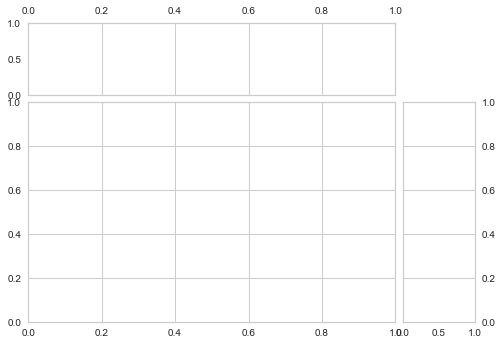

In [36]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['VintageRatingPriceRatio', 'VintageRating'])
visualizer.fit_transform(X, y)
visualizer.show()

In [29]:
print(f"MSE: {MSE}, R2: {r2}")

NameError: name 'MSE' is not defined

ValueError: Found unknown categories ['Ata Rangi Craighall Chardonnay 2015', 'Martin Codax Rías Baixas Albariño Organistrum 2015', 'Georg Breuer Berg Schlossberg Riesling 2017', 'Jean François Ganevat Les Grands Teppes Vieilles Vignes 2012', 'Domaine Thomas & Fils Le Pierrier Sancerre 2017', 'Château Margaux Pavillon Blanc du Château Margaux 2010', 'Chanson Chardonnay Chassagne-Montrachet 2014', "Domaine Laroche Chablis Grand Cru 'Les Clos' 2009", 'Egon Müller - Scharzhof Scharzhofberger Riesling Kabinett 2016', 'Josmeyer H Vieilles Vignes Pinot Auxerrois 2015', 'Pierre Morey Les Tessons Meursault 2015', "Jean-Paul & Benoit Droin Chablis Grand Cru 'Les Clos' 2010", 'Domaine Yves Gangloff Condrieu 2015', 'Vincent Dauvissat Les Clos Chablís Grand Cru 2010', 'Louis Chèze Ro-Rée Saint-Joseph Blanc 2017', 'Newton Chardonnay Unfiltered 2016', 'Silverado Miller Ranch Sauvignon Blanc 2017', 'Domaine Pattes Loup Chablis 2017', 'Château Haut-Brion Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2006', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Auslese 2011', 'Hamilton Russell Vineyards Chardonnay 2017', 'Ata Rangi Craighall Chardonnay 2017', 'Gaja Gaia & Rey Langhe 2016', "Domaine Laroche Chablis Grand Cru 'Les Clos' 2010", 'Kühling-Gillot Pettenthal Riesling GG 2015', 'Kante Vitovska 2006', 'Catena Zapata Adrianna Vineyard White Bones Chardonnay N.V.', 'Luddite Chenin 2014', "Olivier Leflaive Meursault 1er Cru Blagny Sous Le Dos d'Âne 2014", 'Domaine Leflaive Bâtard-Montrachet Grand Cru 2014', 'Leeuwin Estate Art Series Chardonnay 2015', 'Kistler McCrea Vineyard Chardonnay 2017', 'Domaine Ponsot Morey-Saint-Denis Premier Cru Clos des Monts Luisants Vieilles Vignes 2015', 'Dominio do Bibei Ribeira Sacra Lapola 2016', 'Louis Latour Chevalier-Montrachet Grand Cru Les Demoiselles 2010', 'Chêne Bleu Viognier 2016', 'Philippe Pacalet Chassagne-Montrachet 2014', 'Marc Kreydenweiss Kastelberg Grand Cru 2013', 'Olivier Leflaive Bâtard-Montrachet Grand Cru 2006', 'Saint Clair Omaka Reserve Chardonnay 2016', 'El Molino Chardonnay 2010', 'Domaine Roulot Meursault Blanc 2015', 'Ratzenberger St. Jost GG 2013', 'Louis Latour Chassagne-Montrachet Premier Cru 2014', "Bouchard Père & Fils Meursault 1er Cru 'Les Gouttes d'Or' Blanc 2011", "Emidio Pepe Trebbiano d'Abruzzo 2015", 'Vincent Dauvissat Les Clos Chablís Grand Cru 2015', 'Valdesil Pezas da Portela Godello 2016', "Francois Carillon Saint-Aubin 1er Cru 'Les Pitangerets' Blanc 2013", 'Joseph Drouhin Meursault Genevrières Premier Cru 2015', "Château Mouton Rothschild Aile d'Argent Blanc Bordeaux 2014", 'Château de Beaucastel Châteauneuf-du-Pape Blanc 2017', "Philippe Colin Chassagne-Montrachet Premier Cru 'Les Chenevottes' 2016", 'Aubert Chardonnay Larry Hyde & Sons 2013', 'Domaine du Castel La Vie Blanc 2018', 'Guiberteau Brézé Saumur Blanc 2015', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Silex 2016', 'Francois Carillon Puligny-Montrachet 2011', 'Quinta Nova de Nossa Senhora do Carmo Mirabilis Grande Reserva Branco 2017', 'Thorne & Daughters Paper Kite Old Vine Sémillon 2017', "Michel Chevre Les Pentes Clos de l'Écotard Saumur 2016", "Henri Bourgeois Sancerre D'Antan 2016", 'Joachim Flick Hochheim Königin Victoriaberg Riesling Trocken 2016', 'Domaine William Fèvre Chablis Grand Cru Les Clos 2016', 'Faiveley Bienvenues-Bâtard-Montrachet Grand Cru 2011', 'Gravner Anfora Ribolla Gialla 2009', "Marisa Cuomo Fiorduva Costa d'Amalfi 2017", 'Cantina Giardino Bianco 2017', 'Dönnhoff Hermannshöhle Riesling GG 2011', 'Catena Zapata Adrianna Vineyard White Bones Chardonnay 2014', 'Gérard Boulay Sancerre à Chavignol Blanc 2018', 'Domaine Leflaive Bourgogne Blanc 2016', "Domaine Michelot Meursault 'Clos Saint-Felix' Monopole 2015", 'Battenfeld Spanier Am Schwarzen Herrgott Riesling 2016', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'La Boudriotte' 2015", 'S.A. Prüm Wehlener Sonnenuhr Riesling Spätlese 2009', 'Clos Rougeard Brézé Saumur Blanc 2012', "Domaine Georges Vernay Les Chaillées de L'Enfer Condrieu 2015", 'Marc Colin Saint-Aubin La Fontenotte 2015', 'Anselmo Mendes Curtimenta Alvarinho 2016', 'Joseph Drouhin Chassagne-Montrachet Premier Cru Morgeot Marquis de Laguiche  2013', 'Olivier Leflaive Puligny-Montrachet 1er Cru Les Pucelles 2014', 'Château Smith Haut-Lafitte Pessac-Léognan Blanc 2016', 'S.A. Prüm Wehlener Sonnenuhr Riesling Kabinett 2008', 'Hervé Souhaut Domaine Romaneaux - Destezet 2016', "Marcel Deiss Riesling Alsace Grand Cru 'Altenberg de Bergheim' 2007", "Joseph Drouhin Drouhin - Vaudon Chablis Grand Cru 'Les Clos' 2013", "Etienne Sauzet Puligny-Montrachet 1er Cru 'Champ Gain' 2009", 'Domaine Jean-Louis Chave Hermitage Blanc 2010', 'Domaine Huet Vouvray Clos du Bourg Sec 2017', 'Joseph Phelps Freestone Vineyards Chardonnay 2017', "Le Vigne di Zamò Vigne Cinquant'Anni Friulano 2015", 'Bonneau du Martray Corton-Charlemagne Grand Cru 2013', "Abbatucci Diplomate d'Empire (Cuvée Collection Il Cavaliere) 2013", 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Spätlese 2001', 'Luigi Bosca Gala 3 White Blend 2014', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Blanc Fumé de Pouilly 2016', 'Reichsgraf von Kesselstatt Kaseler Riesling Trocken 2016', 'Sonberk Pálava 2017', 'Flowers Sonoma Coast Chardonnay 2015', 'Sadie Family Palladius 2017', 'Domaine Tempier Bandol Blanc 2015', 'Hugel Grossi Laüe Pinot Gris 2011', 'Skerk Ograde 2017', 'Henri Bourgeois Pouilly-Fumé La Demoiselle de Bourgeois 2008', "Château d'Yquem Y 2009", 'E. Guigal Condrieu La Doriane 2006', 'Jean-Paul & Benoit Droin Chablis 2015', 'Kühling-Gillot Pettenthal Riesling GG 2012', 'Monteviejo Lindaflor Chardonnay 2016', 'Planeta Eruzione 1614 Carricante 2017', 'Vessigaud Pouilly-Fuissé Vieilles Vignes 2017', 'Domaine Rapet Corton-Charlemagne Grand Cru 2013', "Domaine Fabien Coche (Domaine Coche-Bizouard) Meursault 'Les Chevalières' 2016", "Jean Claude Bachelet & Fils Saint-Aubin Premier Cru 'Le Charmois' 2015", 'Domaine Coche-Dury Puligny-Montrachet Les Enseignères 2010', 'J. Hofstätter Kolbenhof Gewürztraminer 2017', 'Tapanappa Tiers Vineyard Chardonnay 2008', "Domaine de l'Ecu Carpe Diem 2013", 'Cakebread Chardonnay 2015', 'Domaine William Fèvre Chablis Grand Cru Bougros 2015', 'Château La Mission Haut-Brion Pessac-Léognan Blanc (Château Laville Haut-Brion) (Grand Cru Classé de Graves) 1985', 'Vincent Dauvissat Chablís 2015', 'Uva Mira Mountain Vineyards The Single Tree Chardonnay 2016', "Domaine Long Depaquit Chablis Premier Cru 'Les Vaucoupins' 2016", 'Ramey Chardonnay Platt Vineyard 2013', "Domaine Bachey-Legros Vieilles Vignes Chassagne-Montrachet 1er Cru 'Morgeot' 2015", 'Hubert Lamy Le Concis du Champs Chassagne-Montrachet 2015', 'Duca di Salaparuta Bianca di Valguarnera 2014', 'Chanson Meursault 2012', 'Gaja Gaia & Rey Langhe 1998', 'Patrick Piuze Terroir de Courgis Chablis 2015', 'Château de Santenay Chassagne-Montrachet 2014', 'Bachelet-Monnot Puligny-Montrachet 2015', 'Vincent Dauvissat Les Clos Chablís Grand Cru 2008', "Billaud-Simon Chablis Grand Cru 'Vaudesir' 2015", 'Yardstick Raised by Wolves La Colline Semillon 2016', 'Damijan Podversic Ribolla Gialla 2015', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Auslese 2012', "Jean Chartron Rully 'Montmorin' 2017", 'Coume del Mas Folio Collioure 2018', 'Albert Bichot Meursault 2015', "Raveneau Chablis Premier Cru 'Montée de Tonnerre' 2006", 'Marcel Deiss Mambourg Grand Cru 2014', 'Joh. Jos. Prüm Bernkasteler Badstube Riesling Kabinett 2015', 'Château de Tracy Pouilly-Fumé 2015', 'Williams Selyem Unoaked Chardonnay 2015', "Castell d'Encus Ekam 2017", "Domaine de la Rectorie L'Argile Collioure 2016", 'Badenhorst White Blend 2013', 'Delas Clos Boucher Condrieu 2013', 'Albert Bichot Château Gris Les Terrasses Monopole Nuits-Saint-Georges 2009', 'Penfolds Reserve Bin A Chardonnay 2015', "Amiot Guy Chassagne-Montrachet 1er Cru 'Cailleret' 2014", "Château de La Maltroye Chassagne-Montrachet 1er Cru Morgeot 'Vigne Blanche' 2013", 'Pierre Morey Meursault 2015', 'Zidarich Vitovska Kamen 2016', 'Quintarelli Giuseppe Veneto Amabile del Cere Passito Bianco 2003', 'Jermann W... Dreams Bianco (Were Dreams...) 2014', "Domaine Long Depaquit Chablis Grand Cru 'Les Clos' 2015", 'Louis Latour Corton-Charlemagne Grand Cru 2010', 'Trimbach Clos Sainte Hune Riesling Alsace 2012', 'Lucien le Moine Chassagne-Montrachet 1er Cru Grandes Ruchottes 2009', 'Gaja Gaia & Rey Langhe 2010', 'Ata Rangi Petrie Chardonnay 2014', 'Château Margaux Pavillon Blanc du Château Margaux 2011', 'Quinta de La Rosa Douro Reserva White 2017', 'Marimar Estate Don Miguel Vineyard La Masía Chardonnay 2014', 'Vessigaud Pouilly-Fuissé Vieilles Vignes 2016', "La Chablisienne Chablis Grand Cru 'Les Preuses' 2012", "Francois et Antoine Jobard Meursault 'En la Barre' 2016", 'Hugel Jubilee Riesling 2009', "Jean-Marc Brocard Chablis Premier Cru 'Vau de Vey' 2016", 'Alain Jaume Domaine Grand Veneur Châteauneuf-Du-Pape La Fontaine Blanc 2015', 'Journey Chardonnay 2015', 'Chivite Navarra Coleccion 125 Blanco 2016', 'Vincent Dauvissat Les Clos Chablís Grand Cru 2011', "Philippe Colin Chassagne-Montrachet Premier Cru 'Les Chenevottes' 2017", 'Torres Milmanda 2016', 'Patrick Javillier Cuvée Tete de Murger Meursault 2013', 'Koehler-Ruprecht Kallstadter Saumagen Riesling Kabinett Trocken 2008', "Raveneau Chablis Premier Cru 'Montée de Tonnerre' 2013", "Château de Chamirey Mercurey Premier Cru 'La Mission' Monopole 2017", 'Orin Swift Mannequin 2016', 'Kumeu River Coddington Chardonnay 2010', 'St. Michael-Eppan Sanct Valentin Chardonnay 2017', 'Domaine Jacques Prieur Montrachet Grand Cru Blanc 2013', 'Saint Clair Wairau Reserve Sauvignon Blanc 2017', 'Domaine Zind Humbrecht Gewürztraminer Alsace Grand Cru Goldert 2013', 'Les Héritiers du Comte Lafon Les Maranches Mâcon-Uchizy 2011', 'Antoine Arena Carco Patrimonio Blanc 2017', 'Patrick Piuze Terroir de Chablis 2017', 'Dr. Von Bassermann-Jordan Jesuitengarten Riesling GG 2018', 'Van Volxem Weissburgunder 2014', 'Sadie Family Skurfberg (Die Ouwingerdreeks) 2016', 'T-Oinos Clos Stegasta Αsyrtiko 2014', 'Stella Bella Suckfizzle Sauvignon Blanc - Sémillon 2014', 'Paul Jaboulet Aîné Hermitage Le Chevalier de Sterimberg 2014', 'Momento Chenin Blanc - Verdelho 2017', 'Schäfer-Fröhlich Vulkangestein Riesling Trocken 2013', 'Alzinger Smaragd Loibenberg Grüner Veltliner 2016', 'David & Nadia Chenin Blanc 2016', 'Domaine Zind Humbrecht Pinot Gris Alsace Clos Windsbuhl 2005', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'Les Caillerets' 2013", "Château de Chamirey Mercurey Premier Cru 'La Mission' Monopole 2014", 'Willi Schaefer Graacher Domprobst Riesling Spätlese 2016', 'Dönnhoff Felsenberg GG 2017', 'Vincent Dauvissat Chablís 2013', 'La Meulière Chablis Monts de Milieu 1er Cru 2017', 'Domaine de la Tournelle Les Corvées sous Curon 2015', 'Collovray & Terrier Deux Roches Vieilles Vignes Pouilly-Fuissé 2017', 'Paco de Santar Vinha do Contador Dão Branco 2014', "Terra d'Alter Telhas Alentejano Branco 2014", 'Domaine de La Romanée-Conti Montrachet Grand Cru 2007', 'Walter Hansel The North Slope Vineyard Chardonnay 2016', 'Antinori Castello della Sala Cervaro della Sala 2018', 'Neudorf Vineyards Chardonnay 2014', 'Merlin Vieilles Vignes Mâcon La Roche Vineuse 2012', 'Domaines Schlumberger Cuvée Christine Gewürztraminer Alsace Vendanges Tardives 2015', 'M. Chapoutier Ermitage Le Méal Blanc 2011', 'Louis Jadot - Domaine Duc de Magenta Chassagne-Montrachet 1er Cru Morgeot Monopole Clos de La Chapelle Blanc 2015', 'Skerk Vitovska 2017', 'Barta Pince Öreg Király Dűlő Mád Furmint 2015', 'Planeta Chardonnay 2018', 'Dönnhoff Niederhäuser Hermannshöhle Riesling Spätlese 2013', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Buisson Renard 2007', 'Château de Beaucastel Châteauneuf-du-Pape Blanc 2015', 'Domaine William Fèvre Chablis Grand Cru Les Clos 2005', 'Domaine de Montille Corton-Charlemagne Grand Cru 2014', 'Domaine Henri Milan Le Grand Blanc 2014', 'Philippe Foreau Vouvray Sec 2016', 'Reyneke Reserve White 2016', 'Vincent Pinard Grand Chemarin Sancerre 2014', 'Pithon-Paillé Coteau des Treilles Anjou 2013', "Au Pied du Mont Chauve Chassagne Montrachet 1er Cru 'Les Vergers' 2013", 'Domaine Coche-Dury Meursault Blanc 2007', 'Pascal Jolivet Pouilly-Fumé Indigene 2016', 'Domaine Coche-Dury Meursault Les Rougeots 2007', 'Bucci Villa Bucci Riserva 2015', 'Domaine Coche-Dury Meursault Les Rougeots 2008', 'Pierre-Yves Colin-Morey Saint-Aubin Premier Cru En Remilly 2016', 'Château de Puligny Montrachet Puligny-Montrachet 2016', "François Mikulski Meursault 1er Cru 'Charmes' 2015", 'Bénédicte et Stéphane Tissot La Mailloche 2015', "Jean-Claude Ramonet Chassagne-Montrachet Premier Cru 'Les Ruchottes' Blanc 2013", "Domaine de la Vougeraie Vougeot 1er Cru 'Le Clos Blanc de Vougeot' (Monopole) 2013", "Hubert Lamy Santenay 1er Cru 'Clos des Gravières' Blanc 2015", "Rémi Jobard Meursault 'Sous La Velle' 2017", 'Château Smith Haut-Lafitte Pessac-Léognan Blanc 2015', 'Mchenry Hohnen Burnside Vineyard Chardonnay 2015', 'Domaine Pierre Prieur & Fils Cuvée Maréchal Prieur Sancerre Blanc 2014', 'Terra Remota Caminante 2018', 'Olivier Leflaive Chevalier-Montrachet Grand Cru 2013', 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Pucelles 2011', 'Philippe Foreau Vouvray Demi-Sec 2016', 'Kabaj Amfora 2007', "Jean Noël Gagnard Chassagne-Montrachet 1er Cru 'Les Caillerets' Blanc 2009", 'Domaines Schlumberger Cuvée Christine Gewürztraminer Alsace Vendanges Tardives 2006', 'Oliver Zeter Fumé Sauvignon Blanc 2018', 'Louis Jadot Bâtard-Montrachet Grand Cru 2014', 'Domaine des Comtes Lafon Meursault Clos de la Barre 2013', 'Domaine Zind Humbrecht Riesling Alsace Grand Cru Rangen De Thann Clos Saint Urbain 2016', 'Francois Villard Condrieu Le Grand Vallon 2015', 'Gerard Duplessis Chablis 2017', "Château d'Yquem Y 2017", 'Louis Jadot Bâtard-Montrachet Grand Cru 2013', 'Nicolas Joly Clos de la Coulée de Serrant 2016', 'Domaine Marc Morey & Fils Chassagne-Montrachet Blanc 2017', 'Thevenet Quintaine Cuvée E.J. Thevenet Viré-Clessé 2009', "Château de La Maltroye Chassagne-Montrachet 1er Cru 'La Romanée' 2013", 'Daniel-Etienne Defaix Chablis Vieilles Vignes 2014', 'Paul Hobbs Ellen Lane Estate Chardonnay 2016', 'Grosset Polish Hill Riesling 2017', 'Château Fonréaud Le Cygne Bordeaux Blanc 2015', 'Le Soula Blanc 2013', 'Tiefenbrunner Feldmarschall von Fenner Müller 2011', 'Cabeças do Reguengo Equinócio Branco 2015', "Château de Meursault Meursault 1er Cru 'Perrières' 2013", 'Yves Cuilleron Condrieu La Petite Côte 2012', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2008', 'Bret Brothers & The Soufrandière La Soufrandière Climat Les Longeays Pouilly-Vinzelles 2015', 'R. López de Heredia Viña Tondonia Viña Gravonia 2006', 'Gran Moraine Chardonnay 2016', 'Albert Bichot Montagny Premier Cru 2015', 'Chanson Chassagne-Montrachet Premier Cru Les Chenevottes 2015', 'Sadie Family Palladius 2014', 'Cornin Pouilly-Fuissé 2015', 'Sartarelli Balciana 2008', "Domaine Leflaive Puligny-Montrachet 1er Cru 'Clavoillon' 2015", 'Jermann Vintage Tunina 2009', 'Joh. Jos. Prüm Graacher Himmelreich Riesling Kabinett 2017', 'Telmo Rodriguez MR (Mountain Wine) 2015', 'Jean-Paul & Benoit Droin Chablis Premier Cru Vosgros 2017', 'Kistler Chardonnay 2010', 'Luigi Bosca Gala 3 White Blend 2017', 'Louis Michel & Fils Chablis 2017', 'Nicolas Joly Clos de la Coulée de Serrant 2014', 'Bastianich Vespa Bianco 2015', 'Louis Latour Bâtard-Montrachet Grand Cru 2009', 'Bucci Villa Bucci Riserva 2014', 'Bachelet-Monnot Chassagne-Montrachet 2016', 'Francois Carillon Le Clos du Vieux Château Puligny-Montrachet 2015', "Moreau-Naudet Chablis 1er Cru 'Forêts' 2016", 'Hatzidakis Nykteri 2017', 'Bonneau du Martray Corton-Charlemagne Grand Cru 2014', 'Thevenet Quintaine Cuvée E.J. Thevenet Viré-Clessé 2010', 'Bonneau du Martray Corton-Charlemagne Grand Cru 1997', 'Louis Jadot - Domaine Duc de Magenta Puligny-Montrachet 1er Cru Clos de la Garenne 2015', "Hubert Lamy Saint-Aubin 1er Cru 'Derrière Chez Edouard' Blanc 2015", 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2009', "Hubert Lamy Saint-Aubin 1er Cru 'En Remilly' 2014", 'Château La Mission Haut-Brion Pessac-Léognan Blanc (Château Laville Haut-Brion) (Grand Cru Classé de Graves) 1993', "La Chablisienne Chablis 1er Cru 'Les Lys' 2014", 'Chacra Chardonnay 2018', 'Domaine A Cailbourdin Triptyque Pouilly-Fumé 2015', 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2005', 'Domaine de Montille Bourgogne Blanc 2016', "Domaine de Saint Pierre Chardonnay 'Les Brûlées' 2016", 'Louis Latour Bâtard-Montrachet Grand Cru 2005', 'de Ladoucette Baron de L Pouilly-Fumé 2012', "Domaine William Fèvre Chablis Grand Cru 'Les Preuses' 2007", 'Radikon Slatnik 2016', 'Domaine du Vieux Télégraphe Châteauneuf-du-Pape (La Crau) Blanc 2011', 'Varner Home Block Spring Ridge Vineyard Chardonnay 2013', "Francois Villard Saint Joseph Fruit d'Avilleran 2017", 'Henri Bourgeois Sancerre La Bourgeoise Blanc 2016', 'Patrick Javillier Les Tillets Meursault 2014', 'Au Bon Climat Hildegard 2014', 'Terras Gauda La Mar 2015', 'André Perret Condrieu 2014', 'Villa Huesgen Enkircher Steffensberg Riesling Kabinett Feinherb 2014', 'DAOU Reserve Chardonnay 2017', 'J.M. Boillot Puligny-Montrachet Premier Cru Champ-Canet 2013', 'Château de Puligny Montrachet Saint-Aubin 1er Cru En Remilly 2016', "Bitouzet-Prieur Puligny-Montrachet 'Les Levrons' 2015", 'Quinta da Sequeira Grande Reserva Branco 2014', "Jean-Marc Brocard Chablis Grand Cru 'Les Clos' 2016", "Celine & Laurent Tripoz Mâcon-Vinzelles 'Les Morandes' 2017", 'Pegasus Bay Sauvignon - Sémillon 2013', 'Hugel Jubilee Riesling 2004', 'Domaine Zind Humbrecht Riesling Alsace Clos Häuserer 2016', 'Remoissenet Père & Fils Puligny-Montrachet 2014', 'Alain Girard & Fils Domaine des Brosses Sancerre 2017', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Kabinett 2009', 'Louis Latour Bâtard-Montrachet Grand Cru 2007', 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2007', 'Lvnae Vermentino (Etichetta Nera/Black Label) 2017', 'Domaine Weinbach Clos des Capucins Cuvée Theo Riesling Alsace 2018', 'Pierre-Yves Colin-Morey Saint-Aubin Premier Cru La Chatenière 2016', 'Faiveley Meursault 2016', 'Mullineux Quartz Chenin Blanc 2017', 'Joseph Drouhin Corton-Charlemagne Grand Cru 2016', 'Marani Satrapezo 10 Kvevri 2015', 'Movia Sivi Ambra Grigio 2011', 'Albert Mann Pinot Gris Grand Cru Hengst 2013', 'Schloss Johannisberg Silberlack Riesling Trocken GG 2014', 'Can Ràfols dels Caus La Calma 2016', "Domaine des Malandes Chablis Premier Cru 'Vau de Vey' 2015", "Etienne Sauzet Puligny-Montrachet 1er Cru 'La Garenne' 2013", 'Simonnet-Febvre Les Clos Chablis Grand Cru 2009', 'Domaine Coche-Dury Meursault Les Rougeots 2005', 'Domaine William Fèvre Chablis Premier Cru Fourchaume 2011', 'Tomac Amfora 2008', 'Marqués de Riscal Limousin 2017', 'Domaine Coche-Dury Meursault Blanc 2012', 'Marimar Estate Don Miguel Vineyard Albariño 2016', 'Joseph Drouhin Puligny-Montrachet Premier Cru Folatières 2008', 'Greywacke Riesling 2015', 'Donabaum Setzberg Riesling Smaragd 2015', 'Domaine Sigalas Santorini Barrel 2016', 'Louis Latour Corton-Charlemagne Grand Cru 2015', 'Joh. Jos. Prüm Graacher Himmelreich Riesling Spätlese 2010', 'Domaine Zind Humbrecht Gewürztraminer Alsace Grand Cru Goldert 2007', "Domaine Bohrmann Meursault 'Clos du Cromin' 2011", 'Domaine du Vieux Télégraphe Châteauneuf-du-Pape (La Crau) Blanc 2016', 'Domaine Coche-Dury Meursault Blanc 2014', 'Szepsy Nyulászó Cuvée 2015', 'Francois Carillon Puligny-Montrachet 2016', 'Domaine Vacheron Sancerre Les Romains 2016', "Cos d'Estournel Cos d'Estournel Blanc 2013", 'Rippon Mature Vine Riesling 2018', "Sylvain Loichet Ladoix 'Bois de Gréchons' 2015", 'Reichsrat von Buhl Ungeheuer GG 2015', 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Folatières 2010', 'Domaine Huet Vouvray Le Haut-Lieu Sec 2015', 'Kistler Dutton Ranch Chardonnay 2011', 'Matthew Van Heerden Chardonnay 2016', "Domaine François Lumpp Givry 1er Cru 'Petit Marole' Blanc 2014", 'Elena Walch Beyond the Clouds 2012', 'Domaine de la Charbonnière Châteauneuf-du-Pape Blanc 2016', 'Louis Latour Puligny-Montrachet 1er Cru Les Referts 2013', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2017', 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Folatières 2012', 'Jermann Vintage Tunina 2017', 'Jean François Ganevat Cuvée Florine 2014', 'Pierre-Yves Colin-Morey Saint-Aubin Premier Cru Les Champlots 2015', 'Domaine Laroche Les Vaillons Vieilles Vignes Chablis Premier Cru 2016', 'Domaine des Comtes Lafon Meursault 2012', 'Gauby Jasse Blanc Côtes Catalanes 2018', 'Nicolas Joly Clos de la Coulée de Serrant 2009', "Domaine de l'Arlot Nuits-Saint-Georges Premier Cru Clos de L'Arlot Blanc 2015", 'Dr. H. Thanisch Berncasteler Doctor Riesling Kabinett 2015', 'Au Bon Climat Hildegard 2016', 'J. Rochioli Estate Grown Chardonnay 2014', 'Luis A. Rodriguez Vazquez A Teixa Ribeiro 2016', 'Collovray & Terrier Deux Roches Saint-Véran Tradition 2017', "Henri Darnat Meursault 'Clos du Domaine' 2015", 'Alta Alella Lanius 2017', 'Paul Prieur & Fils Monts Damnes Sancerre 2017', 'M. Chapoutier Chante-Alouette Hermitage Blanc 2017', 'Domaine Henri & Gilles Buisson Saint-Romain La Perriere 2015', "Domaine William Fèvre Chablis Grand Cru 'Les Preuses' 2014", "Vincent Girardin Meursault 'Les Narvaux' 2016", "Domaine Laroche Chablis Grand Cru Les Blanchots Reserve de l'Obédience 2009", 'Trefethen Chardonnay 2016', "Marcel et Blanche Fèvre Chablis Grand Cru  'Les Preuses' 2015", 'Paul Jaboulet Aîné Hermitage Le Chevalier de Sterimberg 2016', 'Domaine de Trévallon Alpilles Blanc 2015', 'Hogan Wines Chenin Blanc 2015', 'Voyager Estate Chardonnay 2014', 'Poeira Branco 2016', 'Louis Latour Chablis La Chanfleure 2017', 'Olivier Leflaive Saint-Romain Sous-Le-Chateâu 2014', 'Garnier et Fils Chablis 2017', 'Franz Hirtzberger Singerriedel - Riesling Smaragd 2015', 'Arnaud Ente Bourgogne Chardonnay 2016', 'Catena Zapata Adrianna Vineyard White Stones Chardonnay 2014', 'Arnaud Ente Bourgogne Chardonnay 2015', 'Terlan (Terlano) Gewürztraminer Lunare 2012', 'Abbatucci Général de la Révolution (Cuvée Collection) 2015', 'Olivier Leflaive Corton-Charlemagne Grand Cru 2012', 'Domaine Jean-Louis Chave Selection Hermitage Blanche 2013', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Spätlese 2014', 'Château Malartic-Lagravière Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2009', 'Domaine Tempier Bandol Blanc 2018', 'François Mikulski Meursault 2017', 'Bouchard Père & Fils Montrachet Grand Cru Blanc 2006', 'Arínzano Gran Vino Blanco 2010', 'Cà dei Frati Brolettino Lugana 2014', 'Sine Qua Non Entre Chien et Loup 2015', "Château d'Yquem Y 2004", 'Yalumba The Virgilius Viognier 2016', 'Alois Lageder Am Sand Gewürztraminer 2016', 'Domaine Alain Chavy Puligny-Montrachet 2016', 'Marc Kreydenweiss Wiebelsberg Grand Cru 2014', 'Louis Max Mercurey Les Rochelles 2016', 'Yves Cuilleron Condrieu La Petite Côte 2018', "Samuel Billaud Chablis 1er Cru 'Montee de Tonnerre' (Les Grands Terroirs) 2015", "Domaine Leflaive Meursault 1er cru sous le Dos d'Ane 2010", "Domaine de la Rectorie L'Argile Collioure 2014", 'Stephane Montez - Domaine du Monteillet Saint-Joseph Blanc 2016', 'Pietradolce Archineri Etna Bianco 2017', 'Sarnin Berrux Saint-Romain Blanc 2014', 'E. Guigal Condrieu La Doriane 2017', 'Flametree S.R.S Wallcliffe Chardonnay 2016', 'Vincent Dauvissat La Forest Chablís 1er Cru 2011', "Domaine de la Cote de l'Ange Châteauneuf-du-Pape Blanc 2016", 'Peyre Rose Oro Blanc 2003', "Jean-Baptiste Adam Vieilles Vignes L'Auxerrois 2016", 'Valdesil Pezas da Portela Godello 2015', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'Morgeot' Blanc 2012", "Jean-Paul & Benoit Droin Chablis Grand Cru 'Les Clos' 2015", 'Szepsy Tokaji Furmint 2015', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2001', 'Bire GRK 2018', 'Pazo Barrantes La Comtesse de Pazo Barrantes Albariño 2015', 'Lis Neris Gris 2016', 'François Mikulski Meursault 2016', 'Cloudy Bay Te Koko Sauvignon Blanc 2010', 'Domaines Ott Clos Mireille Blanc de Blancs 2018', 'De Martino Tres Volcanes Chardonnay 2017', 'Greywacke Chardonnay 2014', 'Pierre-Yves Colin-Morey Chassagne-Montrachet Les Ancegnières 2011', 'Adega Familiar Eladio Piñeiro Frore de Carme 2015', 'Marcel Deiss Gruenspiel 2013', 'Le Vieux Donjon Châteauneuf-du-Pape Blanc 2016', 'Chavy-Chouet Puligny-Montrachet Les Folatieres 1er Cru 2016', 'Manincor Eichhorn Pinot Bianco 2017', 'Domaine de La Romanée-Conti Montrachet Grand Cru 2011', 'Trimbach Clos Sainte Hune Riesling Alsace 2002', 'Raveneau Chablis 2011', 'Conceito Branco 2014', 'Ornellaia Poggio alle Gazze 2015', 'Tablas Creek Vineyard Esprit de Tablas Blanc 2011', 'Louis Jadot - Domaine Duc de Magenta Puligny-Montrachet 1er Cru Clos de la Garenne 2014', 'Stephane Montez - Domaine du Monteillet Les Grandes Chaillées Condrieu 2017', 'Κτημα Τσελεπου (Estate Tselepos) Canava Chrissou Tselepos Santorini Vieilles Vignes 2014', "Domaine Long Depaquit Chablis Grand Cru 'Les Vaudésirs' 2015", 'Peter Franus Albariño 2016', 'Idiom Viognier 2016', 'Domaine Michelot Meursault 2016', 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2001', 'Henri Bourgeois Sancerre La Chapelle Des Augustins 2013', "Domaine Leflaive Meursault 1er cru sous le Dos d'Ane 2016", 'Varner Bee Block Spring Ridge Vineyard Chardonnay 2014', 'Domaine Jean-Louis Chave Hermitage Blanc 2013', "Château d'Yquem Y 2012", 'Jean-Michel Gerin La Loye Condrieu 2018', 'Jean-Michel Gerin La Loye Condrieu 2014', 'Can Bas La Creu 2018', 'Domaine Coche-Dury Puligny-Montrachet Les Enseignères 2013', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'Morgeot' Blanc 2015", 'Bonneau du Martray Corton-Charlemagne Grand Cru 1996', 'Michel & Stéphane Ogier Les Vieilles Vignes de Jacques Vernay Condrieu 2014', 'Domaine Rapet Corton-Charlemagne Grand Cru 2015', 'Château Pape Clément Pessac-Léognan Blanc 2013', 'Flam Blanc 2018', 'Sadie Family Mev. Kirsten (Die Ouwingerdreeks) 2017', 'Domaine Saumaize-Michelin Pouilly-Fuissé Clos Sur la Roche 2016', 'Domaine du Pelican Arbois Savagnin Ouillé 2016', 'Kistler McCrea Vineyard Chardonnay 2012', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Les Referts' 2011", 'Waterford Estate Chenin Blanc 2018', 'Vincent Dauvissat Chablís 2017', 'Holden Manz Barrel Fermented Chardonnay 2018', 'Radikon Slatnik 2017', 'Franz Hirtzberger Hochrain - Riesling Smaragd 2009', 'Francois et Antoine Jobard Meursault-Blagny 1er Cru 2014', 'Château Haut-Brion La Clarté de Haut-Brion Pessac-Léognan Blanc (Les Plantiers du Haut-Brion) 2014', "Raveneau Chablis Premier Cru 'Montée de Tonnerre' 2000", "Jacques Carillon Puligny-Montrachet Premier Cru 'Les Champs Canet' 2015", 'Kistler Trenton Roadhouse Chardonnay 2012', 'Vincent Pinard Harmonie Sancerre 2014', 'E. Guigal Condrieu 2015', 'Domaine Leflaive Bienvenues-Bâtard-Montrachet Grand Cru 2013', 'Peter Michael Belle Côte Chardonnay 2015', 'Stanley Estates Sauvignon Blanc 2016', 'Château Pape Clément Pessac-Léognan Blanc 2007', "Michel Bouzereau Meursault 'Les Grands Charrons' 2016", 'St. Michael-Eppan Appius 2014', "Dupont-Fahn Meursault 'Les Vireuils' 2016", 'André Perret Condrieu Chery 2017', 'Dr. Loosen Wehlener Sonnenuhr Riesling Spätlese 2015', 'Leroy Chassagne-Montrachet Blanc 2009', 'Domaine Anne Gros Cuvée Marine Bourgogne Hautes-Côtes de Nuits Blanc 2017', 'R. López de Heredia Viña Tondonia Viña Tondonia Reserva Blanco 2005', 'Heitz Cellar Chardonnay 2016', 'Marqués de Murrieta Capellanía 2014', 'Franz Haas Manna Schweizer 2016', 'Elena Walch Vigna Kastelaz Gewürztraminer 2018', 'Domaine Leflaive Bâtard-Montrachet Grand Cru 2012', 'Alphonse Mellot Sancerre 2017', 'Villa Russiz Sauvignon de la Tour 2012', 'Quinta da Pellada Primus 2014', 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Folatières 2015', 'Covela Fantástico 2014', 'Yering Station Chardonnay 2016', 'Domaines Ott Clos Mireille Blanc de Blancs 2017', 'Leroy Bourgogne Blanc 2016', "Domaine de Chassorney Saint-Romain 'Combe Bazin' 2016", "Peter Michael L'Après-Midi Sauvignon Blanc 2015", 'Casa da Passarella O Fugitivo Garrafeira Branco 2015', "Raveneau Chablis Premier Cru 'Butteaux' 2004", 'Bonneau du Martray Corton-Charlemagne Grand Cru 2006', 'Clemens Busch Marienburg GG Falkenlay 2016', "Joseph Drouhin Chassagne-Montrachet Premier Cru 'Embazées' 2016", 'Joseph Mellot La Grande Châtelaine Sancerre 2013', 'Momento Mori Staring at the Sun 2018', 'Kistler Vine Hill Vineyard Chardonnay 2013', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Silex 2012', 'Shaw + Smith M3 Chardonnay 2014', "Raveneau Chablis Grand Cru 'Valmur' 2015", 'Casal Farneto Cimaio Bianco 2015', 'Château de Puligny Montrachet Chassagne-Montrachet 2016', 'Evening Land Summum  Seven Springs Vineyard Chardonnay 2014', 'Quinta das Bágeiras Pai Abel Branco 2015', 'Domaine des Comtes Lafon Meursault-Charmes Premier Cru 2015', 'São João 95 Anos de História Blanco 2014', "Domaine Laroche Chablis Premier Cru 'Les Vaudevey' 2018", 'Domaine Henri Boillot Corton-Charlemagne Grand Cru 2014', 'Kistler Stone Flat Vineyard Chardonnay 2012', 'Domaine des Héritiers Louis Jadot Corton-Charlemagne Grand Cru 2005', 'Domaine Coche-Dury Meursault Les Rougeots 2009', 'Manincor Le Petit 2015', 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2012', 'Ramey Russian River Valley Chardonnay 2015', 'Terlan (Terlano) Pinot Bianco Riserva Vorberg 2016', 'Yeringberg Viognier 2015', 'Wittmann Kirchspiel Riesling GG 2016', 'Hamilton Russell Vineyards Chardonnay 2016', "La Chablisienne Chablis 1er Cru 'Côte de Lechet' 2017", 'Michel & Stéphane Ogier Viognier de Rosine 2017', 'Quinta da Muradella Gorvia Blanco 2012', 'Trimbach Pinot Gris Alsace Réserve Personnelle 2015', 'Domaine Georges Vernay Coteau de Vernon Condrieu 2016', "Emile Balland Croq'Caillotte Sancerre 2017", 'Pierre-Yves Colin-Morey Saint-Aubin Premier Cru La Chatenière 2017', 'Bucaco Branco Reservado 2003', "Domaine Bernard Moreau et Fils Chassagne-Montrachet 1er Cru 'La Maltroie' 2015", 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2013', 'Domaine Joel Delaunay La Voûte Chenonceaux Touraine 2017', "Christian Moreau Pere & Fils Chablis Grand Cru 'Les Clos' 2017", 'Terlan (Terlano) Terlaner Classico 1991', 'Domaine des Lambrays Puligny-Montrachet Premier Cru Clos du Cailleret 2009', 'Pierre Gaillard Condrieu 2017', 'Domaine Ostertag Muenchberg Riesling 2017', 'Château Carbonnieux Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2013', 'Marcel Deiss Gruenspiel 2011', 'Bachelder Chardonnay 2014', "Valentin Zusslin Riesling Alsace Grand Cru 'Pfingstberg' 2012", 'Vincent Dauvissat Séchet Chablís Premier Cru 2010', 'J. Rochioli Estate Grown Chardonnay 2012', 'Josmeyer Riesling Grand Cru Hengst 2014', "Domaine Roulot Meursault 1er Cru 'Clos des Bouchères' Monopole 2015", 'Bouchard Père & Fils Meursault Les Clous 2015', 'Do Ferreiro (Bodegas Gerardo Mendez) Cepas Vellas Rias Baixas Albariño 2018', 'HDV Chardonnay (Hyde Vineyard) 2014', 'Tolpuddle Chardonnay 2016', 'Paul Pillot Chassagne-Montrachet 2016', 'de Ladoucette Baron de L Pouilly-Fumé 2017', 'Benoît Ente Puligny-Montrachet 2016', "Domaine Georges Vernay Les Terrasses de L'Empire Condrieu 2011", 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2014', 'Mullineux Radicales Libres 2012', "Domaine Leflaive Meursault 1er cru sous le Dos d'Ane 2009", 'Marcel Deiss Grasberg 2013', 'Antinori Castello della Sala Cervaro della Sala 2016', 'Tiefenbrunner Feldmarschall von Fenner Müller 2016', 'Domaine Ostertag Fronholz Riesling 2016', 'Bénédicte et Stéphane Tissot Les Bruyères 2016', 'Tramin Stoan 2016', "Chanson Chablis Premier Cru 'Montmains' 2012", "Jean-Louis Chavy Puligny-Montrachet 1er Cru 'Les Folatières' 2015", 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2003', 'Joh. Jos. Prüm Graacher Himmelreich Riesling Spätlese 2009', 'Domaine Vacheron Sancerre Le Paradis 2017', 'Dog Point Section 94 Sauvignon Blanc 2014', "Louis Michel & Fils Chablis Premier Cru 'Butteaux' 2017", 'Cape of Good Hope Serruria Chardonnay 2016', "Domaine de la Motte Chablis 1er Cru 'Vau Ligneau' 2016", 'Franz Hirtzberger Steinporz - Weifzburgunder Smaragd 2015', 'Domaine de Bellevue Gaïa 2017', "Domaine de la Vougeraie Vougeot 1er Cru 'Le Clos Blanc de Vougeot' (Monopole) 2011", 'Reichsrat von Buhl Jesuitengarten GG 2012', 'Gaja Rossj-Bass Langhe 2013', 'François Crochet Les Perrois Sancerre 2017', 'Domaine de Montille Puligny-Montrachet 1er Cru Le Cailleret 2013', 'Famille Perrin Châteauneuf-du-Pape Les Sinards Blanc 2011', 'Niepoort Douro Redoma Branco 2016', 'Bucaco Branco Reservado 2013', 'Tramin Unterebner Pinot Grigio 2017', 'Paul Hobbs CrossBarn Sonoma Coast Chardonnay 2015', 'Dog Point Section 94 Sauvignon Blanc 2017', 'Joaquin Vino della Stella Fiano de Avellino 2015', 'Jean-Baptiste Adam Cuvée Jean-Baptiste Kaefferkopf Grand Cru Riesling 2012', 'Château Malartic-Lagravière Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2010', 'Capichera Vign’angena Vermentino di Gallura 2018', 'Yves Cuilleron Condrieu La Petite Côte 2016', 'Château Margaux Pavillon Blanc du Château Margaux 2008', "Raveneau Chablis Premier Cru 'Forêt' 2006", 'Domaine Roulot Meursault Blanc 2011', "Ca' del Bosco Chardonnay 2014", 'Berthet Bondet Château-Chalon 2010', 'Bret Brothers & The Soufrandière Terres de Vergisson Pouilly-Fuissé 2015', 'J.A. Ferret Tournant de Pouilly Pouilly-Fuissé (Cuvée Hors-Classe) 2014', 'Comte Lafond Sancerre Blanc 2017', "Francois Carillon Puligny-Montrachet 1er Cru 'Les Perrières' 2012", 'Domaine Henri Boillot Meursault 1er Cru Les Genevrières 2017', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Les Folatières' 2013", 'La Sorga Ginnungagap 2015', 'Dopff au Moulin Gewürztraminer Grand Cru Brand de Turckheim 2011', "Rémi Jobard Meursault 1er Cru 'Le Poruzot-Dessus' 2014", 'Auvigue Le Moulin du Pont Saint-Véran 2016', "Domaine Alain Chavy Puligny-Montrachet 1er Cru 'Les Folatières' 2012", 'Sadie Family Skerpioen (Die Ouwingerdreeks) 2018', 'Domaine des Comtes Lafon Meursault Clos de la Barre 2014', "Domaine Laurent Cognard Montagny Premier Cru 'Les Bassets' 2016", "La Pousse d'Or Puligny-Montrachet 1er Cru 'Le Cailleret' 2013", 'Château Smith Haut-Lafitte Pessac-Léognan Blanc 2013', 'TOR Durell Vineyard Chardonnay 2014', 'Château de Beaucastel Coudoulet de Beaucastel Côtes du Rhône Blanc 2009', 'J. Bouchon Granito Semillon 2017', 'Alfredo Arribas Trossos Tros Blanc 2013', 'Beaumont Hope Marguerite 2017', 'Schloss Johannisberg Silberlack Riesling Trocken GG 2018', 'Arnaud Ente Bourgogne Chardonnay 2014', "Jean-Claude Ramonet Pernand Vergelesses 'Les Belles Filles' 2015", 'Clemens Busch Marienburg GG Fahrlay 2015', 'Château La Mission Haut-Brion Pessac-Léognan Blanc (Château Laville Haut-Brion) (Grand Cru Classé de Graves) 1998', 'Chavy-Chouet Meursault Les Charmes 1er Cru 2016', "Ervideira Conde d'Ervideira Private Selection Branco 2016", 'Domaine Valette Vieilles Vignes Mâcon-Chaintré 2014', 'Domaine Henri Boillot Puligny-Montrachet 2017', "Arnaud Ente Meursault 'Clos des Ambres' 2010", 'Pepe Mendoza Casa Agrícola Velo Flor Ánfora 2017', 'Marcel Deiss Schoffweg (Le Chemin des Brebis) 2014', 'St. Michael-Eppan Sanct Valentin Weissburgunder (Pinot Bianco) 2016', "Jean-Paul & Benoit Droin Chablis Grand Cru 'Les Clos' 2007", 'J.A. Ferret Les Perrières Pouilly-Fuissé 2016', 'Vina Antunović Premium Limited Edition Chardonnay Sur Lie 2011', "M. Chapoutier Ermitage de l'Orée 1999", 'Chanson Pouilly-Fuissé 2013', 'Domaine Coche-Dury Meursault Blanc 2006', 'Domaine Serge Laloue Sancerre Blanc 2015', 'Pierre Morey Les Tessons Meursault 2009', 'Terras Gauda Terras Gauda O Rosal Etiqueta Negra (Black Label) 2017', 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2002', 'Marc Colin Puligny-Montrachet Le Trézin 2015', 'Von Winning Deidesheimer Kalkofen GG 2017', "Domaine Long Depaquit Chablis Grand Cru 'Moutonne' (Monopole) 2012", 'Guffens-Heynen Tri de Chavigne Mâcon-Pierreclos 2016', 'Louis Latour Chevalier-Montrachet Grand Cru Les Demoiselles 1999', 'Olivier Leflaive Montagny 1er Cru Bonneveaux 2016', 'Michel & Stéphane Ogier La Combe de Malleval Condrieu 2018', "Francois Carillon Puligny-Montrachet 1er Cru 'Les Combettes' 2013", 'Jean-Claude Ramonet Chassagne-Montrachet Blanc 2016', 'Delas Clos Boucher Condrieu 2014', 'Domaine Henri Milan Le Grand Blanc 2015', 'Bader-Mimeur Chateau de Chassagne-Montrachet Blanc 2014', 'Catena Alta Chardonnay 2016', "Vie di Romans Dut' Un 2016", 'Bouchard Père & Fils Chevalier-Montrachet Grand Cru Blanc 2004', "Cave Vinicole de Hunawihr Riesling Alsace Grand Cru 'Rosacker' 2018", 'Jean François Ganevat Champs Poids Chardonnay 2016', "Billaud-Simon Chablis Grand Cru 'Preuses' 2015", 'Faiveley Corton-Charlemagne Grand Cru 2012', 'Olivier Leflaive Bâtard-Montrachet Grand Cru 2009', 'Durand Réserve Durand Sancerre 2017', 'François Mikulski Meursault 2014', 'Domaine Coche-Dury Bourgogne Chardonnay 2016', "Guillot-Broux Mâcon-Cruzille 'Les Genièvrières' 2017", 'Domaine Leflaive Chevalier-Montrachet Grand Cru 2011', 'Faiveley Corton-Charlemagne Grand Cru 2013', 'Beaumont Hope Marguerite 2016', 'Hogan Wines Chenin Blanc 2016', 'Heitz-Lochardet Meursault En la Barre 2015', 'Louis Latour Corton-Charlemagne Grand Cru 2007', 'HDV Chardonnay (Hyde Vineyard) 2009', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2005', 'Alheit Vineyards Hemelrand Vine Garden 2016', 'Chavy-Chouet Les Enseignères Puligny-Montrachet 2017', 'Borgo del Tiglio Collio Friulano 2014', 'Domaine Coche-Dury Puligny-Montrachet Les Enseignères 2012', 'Conceito Branco 2010', 'Domaine Leflaive Puligny-Montrachet 2015', 'Grgich Hills Chardonnay 2014', "Domaine Laroche Chablis Grand Cru 'Les Blanchots' 2012", 'Henri Bourgeois Les Ruchons Sancerre Blanc 2015', 'Joseph Drouhin Puligny-Montrachet Premier Cru Folatières 2015', "Domaine Bohrmann Puligny-Montrachet 'Grands Champs' 2011", 'Hubert Lamy Les Tremblots Vieilles Vignes Puligny-Montrachet 2014', 'Domaine Blain-Gagnard Bâtard-Montrachet Grand Cru 2015', 'Alphonse Mellot Génération Dix-Neuf Sancerre 2016', 'Gaja Rossj-Bass Langhe 2011', 'Pago de Vallegarcía Vallegarcia Viognier 2015', 'Domaine Leflaive Pouilly-Fuissé 2017', 'André Perret Condrieu Chery 2015', "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'Les Caillerets' 2009", "Charly Nicolle Chablis Premier Cru 'Mont de Milieu' 2016", 'Jolie-Laide Fanucchi-Wood Road Trousseau Gris 2017', "Château Mouton Rothschild Aile d'Argent Blanc Bordeaux 2012", 'Clos des Papes (Paul Avril) Châteauneuf-du-Pape Blanc 2011', "Domaine de Chassorney Saint-Romain 'Combe Bazin' 2015", 'B Vintners Haarlem to Hope 2017', 'Nicolas Joly Clos de la Coulée de Serrant 1994', 'Sadie Family Palladius 2007', 'Elian Da Ros Coucou Blanc 2017', "Domaine Laroche Chablis Grand Cru Les Blanchots Reserve de l'Obédience 2015", 'Ossian Capitel 2015', 'Franz Keller Schlossberg Achkarren GG Grauburgunder 2015', 'Aubert Chardonnay Ritchie Vineyard 2014', 'Château de Tracy 101 Rangs Pouilly-Fumé 2012', 'Sadie Family Palladius 2011', 'Matrot Meursault-Blagny 1er Cru 2006', 'Robert Sinskey Orgia 2014', 'Domaine Roulot Meix Chavaux Meursault 2009', 'Eulogio Pomares Maceración Con Pieles 2017', 'Paul Pernot Bienvenues Bâtard - Montrachet Grand Cru 2004', 'Château de Beaucastel Vieilles Vignes Roussanne 2017', 'Domaine Bernard Moreau et Fils Chassagne-Montrachet 2016', 'Château Pape Clément Clémentin de Pape Clément Pessac-Léognan Blanc 2013', 'Korta Katarina Pošip 2017', 'Faiveley Bienvenues-Bâtard-Montrachet Grand Cru 2013', "Domaine de la Janasse Viognier Principauté d'Orange 2018", 'Catena Zapata Adrianna Vineyard White Stones Chardonnay 2016', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Les Combettes' 2015", 'Domaine William Fèvre Chablis Grand Cru Les Clos 2007', 'Bénédicte et Stéphane Tissot Les Graviers 2017', 'Domaine William Fèvre Chablis Grand Cru Bougros 2013', "Domaine Maratray-Dubreuil Ladoix 1er Cru 'En Nagets' Monopole 2014", 'Domaine Leflaive Puligny-Montrachet 1er Cru Les Folatières 2004', 'Domaine du Closel - Château des Vaults Les Caillardières Savennières 2016', 'Domaine William Fèvre Chablis Premier Cru Vaulorent 2017', 'Chavy-Chouet Meursault Les Narvaux 2017', 'Bouchard Père & Fils Corton-Charlemagne Grand Cru Blanc 2009', "Domaine des Malandes Chablis Grand Cru 'Les Clos' 2011", 'Joseph Mellot Cuvée Pierre Etienne Sancerre 2015', 'Botanica Chenin Blanc 2016', 'Louis Latour Corton-Charlemagne Grand Cru 2002', 'Domaine Coche-Dury Corton-Charlemagne Grand Cru 2004', 'Lucien le Moine Corton Grand Cru Blanc 2010', 'Rall White 2017', 'Chavy-Chouet Clos des Corvées de Citeau Meursault 2017', "Domaine Borgeot Puligny-Montrachet 'Les Grands Champs' 2017", 'Cà dei Frati Pratto Bianco (Pratto Benaco Bresciano) 2015', 'Kistler McCrea Vineyard Chardonnay 2006', 'Springfield Estate Méthode Ancienne Chardonnay 2016', "Edmond Vatan Sancerre 'Clos la Néore' 2011", 'Frescobaldi Gorgona 2016', 'Domaine Ostertag Clos Mathis Riesling 2016', 'Vincent Dauvissat Les Preuses Chablís Grand Cru 2007', 'Domaine Weinbach Clos des Capucins Cuvée Sainte Catherine Riesling Alsace Grand Cru Schlossberg 2008', "Domaine Bachey-Legros Santenay 'Sous la Roche' 2016", 'Marcel Deiss Alsace Grand Cru Schoenenbourg 2008', 'Château de Fosse-Sèche Arcane 2016', 'Bagnol Cassis 2018', 'Loimer Langenlois Käferberg 2015', 'Domaine Tessier Les Charmes Dessus Meursault 1er Cru 2014', 'Bonneau du Martray Corton-Charlemagne Grand Cru 2017', 'Domaine du Vieux Lazaret Châteauneuf-du-Pape Blanc 2016', 'Taylors / Wakefield St. Andrews Chardonnay 2017', 'Leitz Rüdesheimer Berg Roseneck Katerloch Riesling 2011', 'Château de Beaucastel Châteauneuf-du-Pape Blanc 2014', "Château de Chamirey Mercurey 'En Pierrelet' Blanc 2014", "Tokara Director's Reserve White 2014", 'Château Haut-Brion Pessac-Léognan Blanc (Grand Cru Classé de Graves) 1999', "Francois Carillon Puligny-Montrachet 1er Cru 'Les Combettes' 2016", 'Domaine William Fèvre Chablis Grand Cru Bougros 2011', "Gaja Ca'Marcanda Vistamare Toscana 2017", 'Francois Carillon Puligny-Montrachet 2012', 'Domaine Zind Humbrecht Pinot Gris Alsace Clos Windsbuhl 2015', 'Matassa Blossom Blanc 2018', "Faiveley Meursault 1er Cru 'Blagny' Blanc 2014", 'Domaine Leflaive Puligny-Montrachet 2010', 'Marcel Deiss Mambourg Grand Cru 2011', 'Albert Mann Pinot Gris Grand Cru Furstentum 2013', 'Lukas Van Loggerenberg Kameraderie 2016', 'Gran Moraine Chardonnay 2015', 'Château-Grillet Blanc 2002', 'Mullineux Quartz Chenin Blanc 2016', 'Quinta do Vale Meão Meandro Douro Branco 2017', 'Château Fuissé Pouilly-Fuissé Le Clos Monopole 2017', 'Francois et Antoine Jobard Meursault-Blagny 1er Cru 2013', 'Lismore Sauvignon Blanc 2017', "Domaine du Pavillon Beaune 1er Cru 'Le Clos des Mouches' 2011", 'Patz & Hall Hyde Vineyard Chardonnay 2015', 'Mullineux Old Vines White 2014', 'Bénédicte et Stéphane Tissot La Mailloche 2011', "Hubert Lamy Saint-Aubin 1er Cru 'Les Frionnes' 2012", "Jean Chartron Puligny-Montrachet Premier Cru 'Clos de la Pucelle' Monopole 2011", "Domaine Henri Boillot Puligny-Montrachet 1er Cru 'Clos de La Mouchère' (Monopole) 2011", 'Agnès Paquet Auxey-Duresses Blanc 2017', 'Penfolds Yattarna Chardonnay (BIN 144) 2017', 'Gaja Rossj-Bass Langhe 2017', 'Bonneau du Martray Corton-Charlemagne Grand Cru 2007', "Hubert Lamy Santenay 1er Cru 'Clos des Gravières' Blanc 2014", "Eric Forest L'Ame Forest Pouilly-Fuissé 2016", 'Paul Pernot Puligny-Montrachet 2016', 'Domaine des Sénéchaux Châteauneuf-du-Pape Blanc 2017', 'Domaine de Pouilly Cuvée Prestige Pouilly-Fuisse 2017', "Domaine Laroche Chablis Grand Cru Les Blanchots Reserve de l'Obédience 2011", 'Marc Colin Saint-Aubin 1er Cru La Chatenière 2016', 'Marcassin Marcassin Vineyard Chardonnay 2008', 'Von Winning Sauvignon Blanc 500 2017', "Bruno Colin Chassagne-Montrachet Premier Cru 'Les Chaumées' 2013", 'Bosman Family Vineyards Optenhorst Chenin Blanc 2016', 'Allende Martires Rioja 2016', 'Quinta dos Carvalhais Dão Branco Especial 2017', 'Chanson Savigny-Les-Beaune Premier Cru Hauts Marconnets 2015', 'Bucci Villa Bucci Riserva 2016', "Jean-Paul & Benoit Droin Chablis Grand Cru 'Grenouille' 2014", 'Joseph Burrier (Château de Beauregard) Pouilly-Fuissé 2014', 'Alphonse Mellot Edmond Sancerre 2014', 'Domaine Coche-Dury Bourgogne Aligoté 2011', 'Domaine de Bellène Savigny-lès-Beaune 2013', 'Domaine Weinbach Clos des Capucins Gewürztraminer Alsace Cuvée Théo 2014', 'Casa Marin Estero Vineyard Sauvignon Gris 2018', 'Reichsrat von Buhl Pechstein GG 2017', 'Domaine des Comtes Lafon Meursault-Charmes Premier Cru 2010', 'Rall Grenache Blanc 2016', 'Domaine Huet Vouvray Le Mont Demi-Sec 2017', 'Clemens Busch Marienburg GG 2012', 'Domaine Coche-Dury Puligny-Montrachet Les Enseignères 2007', "Domaine du Colombier Chablis Premier Cru 'Fourchaume' 2017", 'Vie di Romans Piere Sauvignon Blanc 2017', 'Zidarich Vitovska Collection 2009', 'Gundog Wild Sémillon 2015', 'Gravner Ribolla Gialla 2009', 'R. López de Heredia Viña Tondonia Viña Tondonia Reserva Blanco 2006', 'Cartuxa Scala Coeli Branco 2012', 'Elena Walch Beyond the Clouds 2017', 'Domaine Jean-Louis Chave Hermitage Blanc 2004', 'Rhys Vineyards Horseshoe Vineyard Chardonnay 2013', 'Schloss Johannisberg Rotlack Riesling Kabinett Feinherb 2014', 'Venus la Universal Dido Macabeu - Garnatxa - Cartoixa 2015', 'Henri Bourgeois Sancerre Etienne Henri 2013', 'Vincent Dauvissat Les Clos Chablís Grand Cru 2002', 'Hospices de Beaune Pouilly-Fuissé Cuvée Françoise Poisard 2011', "Rijk's Reserve Chenin Blanc 2014", 'Domaine Grangier Les Terrasses Condrieu 2017', 'Anselmo Mendes Curtimenta Alvarinho 2013', 'Donelan Nancie Chardonnay 2013', 'Bonneau du Martray Corton-Charlemagne Grand Cru 2010', 'Gauby Coume Gineste Côtes Catalanes 2012', 'Dönnhoff Höllenpfad Riesling Trocken 2013', 'Gaja Gaia & Rey Langhe 2008', "Jean-Paul & Benoit Droin Chablis Grand Cru 'Les Clos' 2014", 'Patrick Javillier Les Tillets Meursault 2016', "Kumeu River Maté's Vineyard Chardonnay 2017", 'Allende Rioja Blanco 2014', "Jean-Marc Brocard Chablis Premier Cru 'Fourchaume' 2017", 'Schloss Johannisberg Rotlack Riesling Kabinett Trocken 2018', 'Domaine Huet Vouvray Le Haut-Lieu Sec 2009', 'Louis Latour Corton-Charlemagne Grand Cru 2006', "Marcel Deiss Riesling Alsace Grand Cru 'Altenberg de Bergheim' 2010", 'Trimbach Clos Sainte Hune Riesling Alsace 1997', 'Ramey Chardonnay Hyde Vineyard 2015', 'Leroy Puligny-Montrachet Premier Cru Sous le Puits 2009', 'Savage Never Been Asked To Dance 2017', 'Vie di Romans Piere Sauvignon Blanc 2008', 'Rupert & Rothschild Baroness Nadine 2012', 'Yves Cuilleron Condrieu Les Chaillets 2016', 'Uva Mira Mountain Vineyards Chardonnay 2016', 'Telmo Rodriguez Branco de Santa Cruz 2015', 'Paul Lato Le Souvenir Sierra Madre Vineyard Chardonnay 2016', "Jean-Claude Ramonet Puligny-Montrachet Premier Cru 'Champs-Canet' 2013", 'Lieselehof Vino del Passo 2018', 'Maxime Magnon La Bégou White 2018', "Au Pied du Mont Chauve Chassagne Montrachet 'En Pimont' 2014", 'Eulogio Pomares Maceración Con Pieles 2016', 'Marcel Deiss Alsace Grand Cru Schoenenbourg 2009', "Vincent Girardin Meursault 1er Cru 'Les Perrières' 2015", "Beaumont Vitruvia aka 'New Baby' 2016", 'Domaine Bernard Moreau et Fils Chassagne-Montrachet 1er Cru Champsgain 2013', 'Bachelet-Monnot Bourgogne Blanc 2017', "Domaine Marc Morey & Fils Puligny-Montrachet 1er Cru 'Les Referts' 2007", 'Peter Michael Mon Plaisir Chardonnay 2014', 'Domaine Henri Boillot Puligny-Montrachet 2015', 'Maxime Magnon La Bégou White 2016', 'Eugenio Rosi Anisos 2015', 'Jean François Ganevat Les Chalasses Vieilles Vignes 2014', "Domaine Gérard Thomas Saint-Aubin 'Champ Tirant' 2017", 'Dönnhoff Niederhäuser Hermannshöhle Riesling Spätlese 2017', "Michel Bouzereau Meursault-Charmes 1er Cru 'Les Charmes Dessus' 2015", 'Crystallum Clay Shales Chardonnay 2011', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Buisson Renard 2010', "Domaine de Bellivière Jasnières 'Les Rosiers' 2016", 'Colterenzio (Schreckbichl) Lafóa Sauvignon 2013', 'Valdesil Pezas da Portela Godello 2014', 'Eisele Vineyard Sauvignon Blanc 2015', 'Louis Michel & Fils Chablis Premier Cru Forets 2016', 'Vincent Dauvissat Les Preuses Chablís Grand Cru 2015', 'Fefiñanes Albariño de Fefiñanes III Año 2012', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Silex 2009', 'Domaine de la Mordoree La Reine des Bois Lirac Blanc 2016', "Domaine de l'Ecu Taurus 2012", 'GlenWood Grand Duc Chardonnay 2015', 'Pierre-Yves Colin-Morey Chardonnay Bourgogne 2016', 'Domaine de La Romanée-Conti Montrachet Grand Cru 2008', "Château de La Maltroye Chassagne-Montrachet 1er Cru Morgeot 'Vigne Blanche' 2016", 'Fontaine-Gagnard Bâtard-Montrachet Grand Cru 2011', 'Pierre Morey Bourgogne Chardonnay 2016', 'Château Lamothe-Bouscaut Pessac-Léognan Blanc 2015', 'Domaine de Chevalier Pessac-Léognan Blanc (Grand Cru Classé de Graves) 2016', 'Suavia Monte Carbonare 2017', 'Jordan Chardonnay 2016', 'Dittiére Sylvain La Porte Saint Jean La Perlée 2016', 'Vina Franković Korona Sur Lie Malvazija 2016', 'Château Lynch-Bages Blanc de Lynch-Bages N.V.', 'Jean-Michel Gerin La Loye Condrieu 2016', 'Remelluri Rioja Blanco 2012', 'Nicolas Joly Clos de la Coulée de Serrant 2001', "Billaud-Simon Chablis 1er Cru 'Vaillons' 2016", 'Niepoort Dócil Au-Au Branco 2012', 'Trimbach Pinot Gris Alsace Réserve Personnelle 2012', "Vincent Girardin Puligny-Montrachet 1er Cru 'Les Combettes' 2014", 'Domaine de La Romanée-Conti Montrachet Grand Cru 1993', "Bouchard Père & Fils Meursault 1er Cru 'Genevrières' Blanc 2016", 'Alain Voge Fleur de Crussol Saint-Péray 2017', 'Château Haut-Brion La Clarté de Haut-Brion Pessac-Léognan Blanc (Les Plantiers du Haut-Brion) 2013', "Albert Grivault Meursault 1er Cru 'Perrières' 2015", 'Nin-Ortiz Selma de Nin Blanco 2013', "Samuel Billaud Chablis 1er Cru 'Montee de Tonnerre' (Les Grands Terroirs) 2014", 'Domaine Laroche Montée de Tonnerre Chablis Premier Cru 2015', 'Marcassin Marcassin Vineyard Chardonnay 2006', "Christian Moreau Pere & Fils Chablis Grand Cru 'Les Clos' 2016", 'F.X. Pichler Dürnsteiner Kellerberg Riesling Smaragd 2017', 'Leroy Puligny-Montrachet Premier Cru Sous le Puits 2011', "Quintodecimo Giallo d'Arles Greco di Tufo 2018", 'Ten Minutes by Tractor Estate Chardonnay 2014', "Domaine Maratray-Dubreuil Ladoix 1er Cru 'Les Gréchons' 2016", 'Louis Latour Puligny-Montrachet 2015', "Billaud-Simon Chablis Tête d'Or 2016", "Jean-Paul & Benoit Droin Chablis Premier Cru 'Montée de Tonnerre' 2010", 'Marcel Deiss Mambourg Grand Cru 2013', "Francois Carillon Puligny-Montrachet 1er Cru 'Les Perrières' 2013", 'Chandon de Briailles Corton Grand Cru Blanc 2014', 'Cloudy Bay Te Koko Sauvignon Blanc 2013', 'Thevenet Quintaine Cuvée E.J. Thevenet Viré-Clessé 2015', 'Domaine des Comtes Lafon Meursault Clos de la Barre 2011', 'Domaine des Comtes Lafon Meursault 2010', 'Pierre-Yves Colin-Morey Chassagne-Montrachet Premier Cru Les Chenevottes 2015', 'Domaine Zind Humbrecht Pinot Gris Alsace Grand Cru Rangen de Thann Clos Saint Urbain 2016', 'Forjas del Salnés Cos Pés Vinos Atlánticos 2017', 'Louis Latour Meursault-Blagny Premier Cru Château de Blagny 2014', 'Abbatucci Général de la Révolution (Cuvée Collection) 2013', 'Domaine Dujac Les Combettes Puligny-Montrachet 1er Cru 2014', 'Badenhorst Sout Van Die Aarde Palomino 2016', 'Montonale Orestilla 2017', 'Tardieu-Laurent Condrieu 2011', 'Feudi Studi Arianiello 2012', 'Domaine Zind Humbrecht Gewürztraminer Alsace Clos Windsbuhl 2005', 'Casa de Santar Vinha Dos Amores Encruzado Dão Branco 2014', 'The Eyrie Vineyards Chardonnay 2015', 'Au Bon Climat Chardonnay Santa Barbara County 2017', 'Louis Latour Chassagne-Montrachet 1er Cru Cailleret 2014', "La Chablisienne Chablis 1er Cru 'Mont de Milieu' 2016", "Thorne & Daughters Cat's Cradle Chenin Blanc 2017", 'Domaine Coche-Dury Meursault Les Rougeots 2012', 'Château Smith Haut-Lafitte Pessac-Léognan Blanc 2009', 'Domaine des Comtes Lafon Meursault-Charmes Premier Cru 2000', 'Etienne Sauzet Bâtard-Montrachet Grand Cru 2010', "Domaine Michel Niellon Chassagne-Montrachet 1er Cru 'Clos de la Maltroie' 2015", "Fontaine-Gagnard Chassagne-Montrachet 1er Cru 'La Boudriotte' 2013", 'Liquid Farm Chardonnay White Hill 2015', 'Giant Steps Lusatia Park Vineyard Chardonnay 2016', 'Tramin Nussbaumer Gewürztraminer 2014', "Domaine Henri Boillot Puligny-Montrachet 1er Cru 'Clos de La Mouchère' (Monopole) 2008", 'Domaine des Comtes Lafon Meursault-Charmes Premier Cru 2013', 'Domaine Belluard Les Alpes 2017', 'Joseph Drouhin Montrachet Grand Cru Marquis de Laguiche 2010', 'Niepoort Douro Reserva Redoma Branco 2018', 'Alexandre Bain Pierre Précieuse Pouilly-Fumé 2017', 'Greywacke Chardonnay 2015', 'Chanson Pouilly-Fuissé 2015', "Jean Chartron Puligny-Montrachet Premier Cru 'Clos de la Pucelle' Monopole 2016", "Domaine Laroche Chablis Grand Cru 'Les Clos' 2008", 'Antinori Castello della Sala Conte della Vipera 2018', 'Domaine Arnaud Lambert Clos David Saumur 2015', 'Michel Redde Barre A Mine Blanc Fumé de Pouilly 2015', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Pur Sang 2010', "Jean Loron Pouilly-Fuissé 'Les Vieux Murs' 2016", 'Clemens Busch Marienburg Rothenpfad GG 2014', 'Bodegas El Paraguas La Sombrilla 2016', 'Ornellaia Toscana Bianco 2015', 'Cenatiempo Kalimera 2017', 'Didier Dagueneau (Louis-Benjamin Dagueneau) Blanc Fumé de Pouilly 2014', "Bernard Defaix Chablis 1er Cru 'Côte de Lechet' 2017", "Pascal Clément Pernand Vergelesses 'Les Combottes' 2015", 'Κτημα Τσελεπου (Estate Tselepos) Canava Chrissou Tselepos Santorini Vieilles Vignes 2018', 'Pazo Barrantes La Comtesse de Pazo Barrantes Albariño 2014', 'Château Fuissé Pouilly-Fuissé Tête de Cru 2016', 'Heymann-Löwenstein Schieferterrassen 2015', 'Vincent Dauvissat La Forest Chablís 1er Cru 2015', 'Arnaud Ente Meursault 2007', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Les Folatières' 2010", 'Clos Sainte Magdeleine Bel-Arme Cassis 2017', 'Domaine William Fèvre Chablis Grand Cru Bougros Côte Bouguerots 2016', 'Domaine Leflaive Bâtard-Montrachet Grand Cru 2009', 'Michel Redde Les Bois de Saint-Andelain Blanc Fumé de Pouilly 2013', 'Thorne & Daughters Rocking Horse Cape White 2017', 'Henri Bourgeois Sancerre Jadis 2014', "Tyrrell's Vat 1 Sémillon 2011", 'Grosset Polish Hill Riesling 2013', 'Stratus White 2012', 'Clos Rougeard Brézé Saumur Blanc 2010', 'Comte Lafond Sancerre Blanc 2018', 'Pazo Barrantes La Comtesse de Pazo Barrantes Albariño 2016', "Bitouzet-Prieur Meursault 'Clos du Cromin' 2015", 'Domaine Alain Chavy Puligny-Montrachet 2015', 'Domaine Leflaive Puligny-Montrachet 2016', 'Guffens-Heynen 1er Jus de Chavigne Mâcon-Pierreclos 2015', 'Dr. Loosen Riesling Auslese Wehlener Sonnenuhr 2010', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Auslese 2010', 'Dirty & Rowdy Familiar Blanc 2015', 'Clos des Papes (Paul Avril) Châteauneuf-du-Pape Blanc 2010', 'Olivier Leflaive Puligny-Montrachet 1er Cru Champ-Canet 2013', 'Domaine Leflaive Bienvenues-Bâtard-Montrachet Grand Cru 2007', 'Kottabos Chenin Blanc 2018', 'Château Simone Palette Blanc 2015', "Etienne Sauzet Puligny-Montrachet 1er Cru 'Champ Canet' 2005", 'Penfolds Reserve Bin A Chardonnay 2013', "Domaine Fouassier Sancerre 'Les Chailloux' 2014", 'Domaine William Fèvre Chablis Premier Cru Vaulorent 2016', 'Joseph Drouhin Montrachet Grand Cru Marquis de Laguiche 1998', "Château d'Yquem Y 2000", 'Georg Breuer Berg Schlossberg Riesling 2012', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Auslese 2013', "Domaine Long Depaquit Chablis Premier Cru 'Les Vaillons' 2016", "Francois Carillon Puligny-Montrachet 1er Cru 'Les Combettes' 2015", 'Louis Jadot - Domaine Duc de Magenta Chassagne-Montrachet 1er Cru Morgeot Monopole Clos de La Chapelle Blanc 2016', 'Faiveley Puligny-Montrachet 2016', 'Marina Coppi Fausto 2012', 'Clos de Gat Chardonnay 2016', 'Knipser Mandelpfad Riesling GG 2016', 'Au Bon Climat Chardonnay Sanford & Benedict Vineyard 2015', 'Paul Jaboulet Aîné Hermitage Le Chevalier de Sterimberg 2015', 'Olivier Tricon Chablis 2018', 'Domaine Jean Collet Chablis Premier Cru Vaillons 2012', 'Schloss Gobelsburg Riesling Alte Reben 2006', 'Miani Friulano 2015', 'Santiago Ruiz Albariño (O Rosal) 2018', 'Domaine Huet Vouvray Le Mont Sec 2017', 'Kistler Hyde Vineyard Chardonnay 2014', "Ca' del Bosco Chardonnay 2015", "Raveneau Chablis Premier Cru 'Montée de Tonnerre' 2009", "Daniel-Etienne Defaix Chablis Premier Cru 'Côte de Lechet' 2005", 'Gaja Alteni di Brassica Langhe 2013', 'Domaine Roulot Tessons Clos de Mon Plaisir Meursault 2008', 'Battenfeld Spanier Mölsheim Riesling 2013', 'Trimbach Clos Sainte Hune Riesling Alsace 1999', "Jean Marc Pillot Chassagne-Montrachet 'Les Pierres' 2015", 'Clos Rougeard Brézé Saumur Blanc 2008', 'Vincent Girardin Corton-Charlemagne Grand Cru 2013', 'Louis Latour Chablis 2017', 'Marqués de Murrieta Capellanía 2015', 'Matrot Meursault Perrières 1er Cru 2013', 'Etienne Sauzet Puligny-Montrachet 2017', "Tasca d'Almerita Tenuta Regaleali Chardonnay Vigna San Francesco 2011", "Domaines Schlumberger Riesling Alsace Grand Cru 'Saering' 2014", 'Pierro Chardonnay 2017', 'Au Bon Climat Wild Boy Chardonnay 2014', 'Chivite Navarra Coleccion 125 Blanco 2015', 'Matrot Meursault-Blagny 1er Cru 2014', 'Joseph Mellot La Chatellenie Sancerre 2015', 'Quinta Edmun do Val Reserva Alvarinho 2013', 'Joh. Jos. Prüm Wehlener Sonnenuhr Riesling Kabinett 2015', 'Chavy-Chouet Meursault Les Casse-Tetes 2011', "Château de La Maltroye Chassagne-Montrachet 1er Cru Morgeot 'Vigne Blanche' 2011", "Christophe Denizot - Domaine des Moirots Montagny 1er Cru 'Le Vieux Château' 2017", 'Roagna Solea Langhe 2014', 'Pichler-Krutzler Trum Riesling 2016', "Cal Pla Mas d'en Compte Priorat White 2014", 'Domaine Nathalie et Gilles Fevre Vaulorent Chablis Premier Cru 2014', 'Dr. Loosen Wehlener Sonnenuhr Alte Reben Riesling Dry GG 2012', 'Alves de Sousa Berço Branco 2012', 'Paul Pillot Saint-Aubin 1er Cru Les Charmois 2016', "Amiot Guy Chassagne-Montrachet 1er Cru 'Cailleret' 2015", 'Kistler Chardonnay 2014', 'Smith-Madrone Winery & Vineyards Riesling 2014', 'Constantia Glen Two Blanc 2016', 'Mira do Ó Druida Encruzado Reserva 2017', 'Domaine de La Romanée-Conti Montrachet Grand Cru 1998', 'Salvador Quinta da Calçada Vinhas Velhas Branco 2015', 'Alpha Estate (Κτήμα Αλφα) Sauvignon Blanc Fumé 2018', 'Kistler McCrea Vineyard Chardonnay 2011', "Ettore Sammarco Vigna Grotta Piana Ravello Costa d'Amalfi 2016", 'Leitz Rüdesheimer Berg Schlossberg Riesling Alte Reben 2009', 'Château Musar Blanc (Gaston Hochar) 2004', "Billaud-Simon Chablis Grand Cru 'Vaudesir' 2013", 'Hubert Lamy Les Tremblots Vieilles Vignes Puligny-Montrachet 2016', "Arnaud Ente Meursault 'Clos des Ambres' 2009", 'Marc Colin Chassagne-Montrachet 1er Cru Les Champs Gain 2010', 'Château de Beaucastel Châteauneuf-du-Pape Blanc 2003', "Tyrrell's Vat 47 Chardonnay 2010", 'José Pariente Cuvée Especial Verdejo 2014', 'Denis Race Montmains Chablis 1er Cru 2017', 'Pacherhof Private Cuvée 2016', 'Passopisciaro Passobianco 2016'] in column 0 during transform

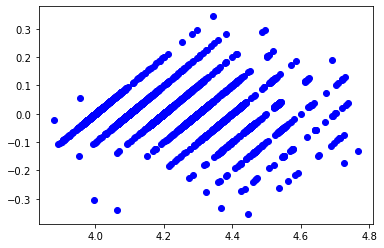

In [28]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
ax.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
ax.legend()
ax.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
ax.set_title("Residual Plot")
fig.show()